In [1]:
import pandas as pd

# 定义文件路径
file_path = 'raw_data.csv' # 假设 CSV 文件与 Notebook 在同一目录下

# 读取 CSV 文件
try:
    df = pd.read_csv(file_path)
    # 显示数据的前几行以确认读取成功
    print(df.head())
except FileNotFoundError:
    print(f"错误：找不到文件 {file_path}")
except Exception as e:
    print(f"读取文件时发生错误：{e}")


   day_number  floor                         process assigned_trade  \
0           0      1  Electric conduits in the floor    Electricity   
1           0      2  Electric conduits in the floor    Electricity   
2           0      3  Electric conduits in the floor    Electricity   
3           0      4  Electric conduits in the floor    Electricity   
4           0      5  Electric conduits in the floor    Electricity   

   planned_remaining  is_valid task_status  initial_production_rate  \
0                 74     False     pending                       51   
1                 74     False     pending                       51   
2                 74     False     pending                       51   
3                 74     False     pending                       51   
4                 74     False     pending                       51   

   actual_efficiency  remain_work is_rework  today_workload  \
0                NaN           74       NaN             NaN   
1                NaN

c:\Users\asus\.conda\envs\play\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\play\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\play\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\play\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\play\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) m

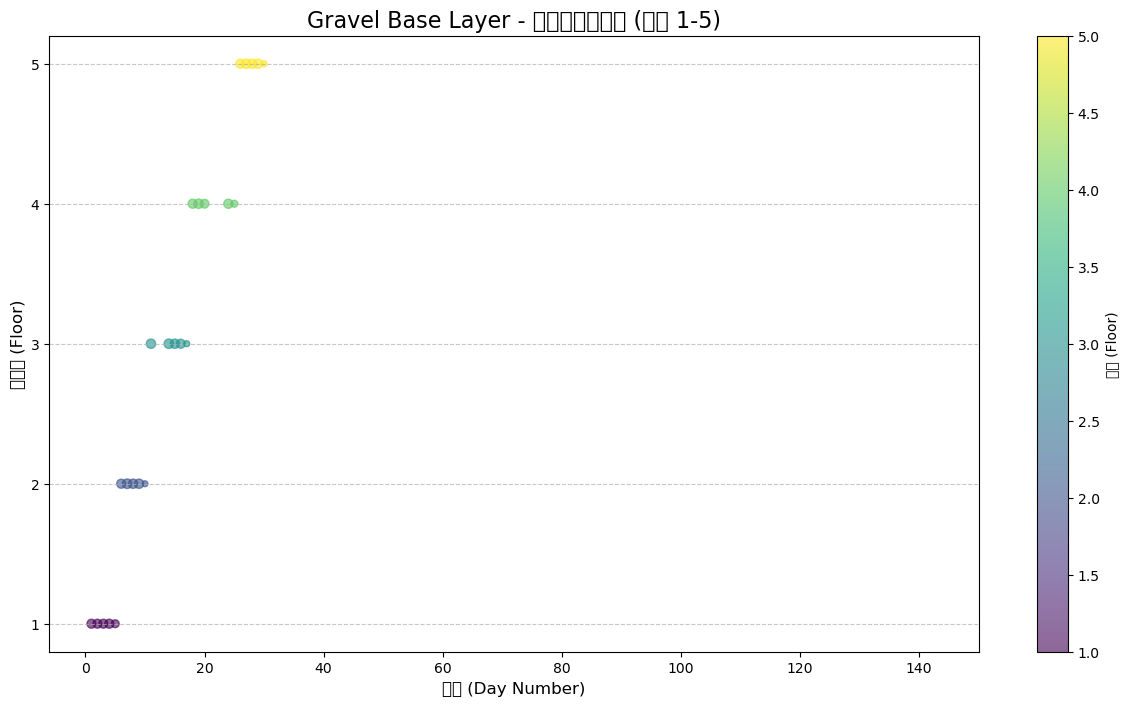

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Ensure pandas is imported if running in a new session

# --- 数据准备 ---
# 假设 'df' DataFrame 已在之前的单元格中加载

# 1. 筛选 'process' 列为 'Gravel base layer' 的数据
gravel_df = df[df['process'] == 'Gravel base layer'].copy()

# 2. 筛选 'floor' 列为 1 到 5 的数据
gravel_df = gravel_df[gravel_df['floor'].isin(range(1, 6))]

# 3. 计算每日工作量比例 (today_workload / planned_remaining)
#    为避免除以零错误，将 planned_remaining 中的 0 替换为 NaN
gravel_df['planned_remaining_safe'] = gravel_df['planned_remaining'].replace(0, np.nan)
gravel_df['workload_ratio'] = gravel_df['today_workload'] / gravel_df['planned_remaining_safe']

#    处理计算结果为 NaN 的情况 (例如，如果 today_workload 或 planned_remaining_safe 是 NaN)
#    可以选择删除这些行或用 0 填充，这里我们删除它们
gravel_df.dropna(subset=['workload_ratio'], inplace=True)

# --- 可视化 ---
plt.figure(figsize=(15, 8)) # 设置图形大小

# 使用散点图可视化，点的大小表示 workload_ratio
# 您可能需要调整 s (大小) 的乘数因子以获得最佳视觉效果
scatter = plt.scatter(
    gravel_df['day_number'], # 使用 'day_number' 作为 X 轴
    gravel_df['floor'],
    s=gravel_df['workload_ratio'] * 200,  # 乘以一个因子来调整点的大小
    alpha=0.6,                          # 设置透明度
    c=gravel_df['floor'],               # 用颜色区分不同楼层
    cmap='viridis'                      # 选择一个颜色映射
)

# 添加标题和标签
plt.title('Gravel Base Layer - 每日工作量比例 (楼层 1-5)', fontsize=16)
plt.xlabel('天数 (Day Number)', fontsize=12) # 更新 X 轴标签
plt.ylabel('楼层数 (Floor)', fontsize=12)

# 设置 Y 轴刻度为整数楼层
plt.yticks(range(1, 6))

# 添加颜色条以解释颜色代表的楼层
plt.colorbar(scatter, label='楼层 (Floor)')

# 添加网格线以便于阅读
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 显示图形
plt.show()

c:\Users\asus\.conda\envs\play\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\play\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\play\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\.conda\envs\play\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


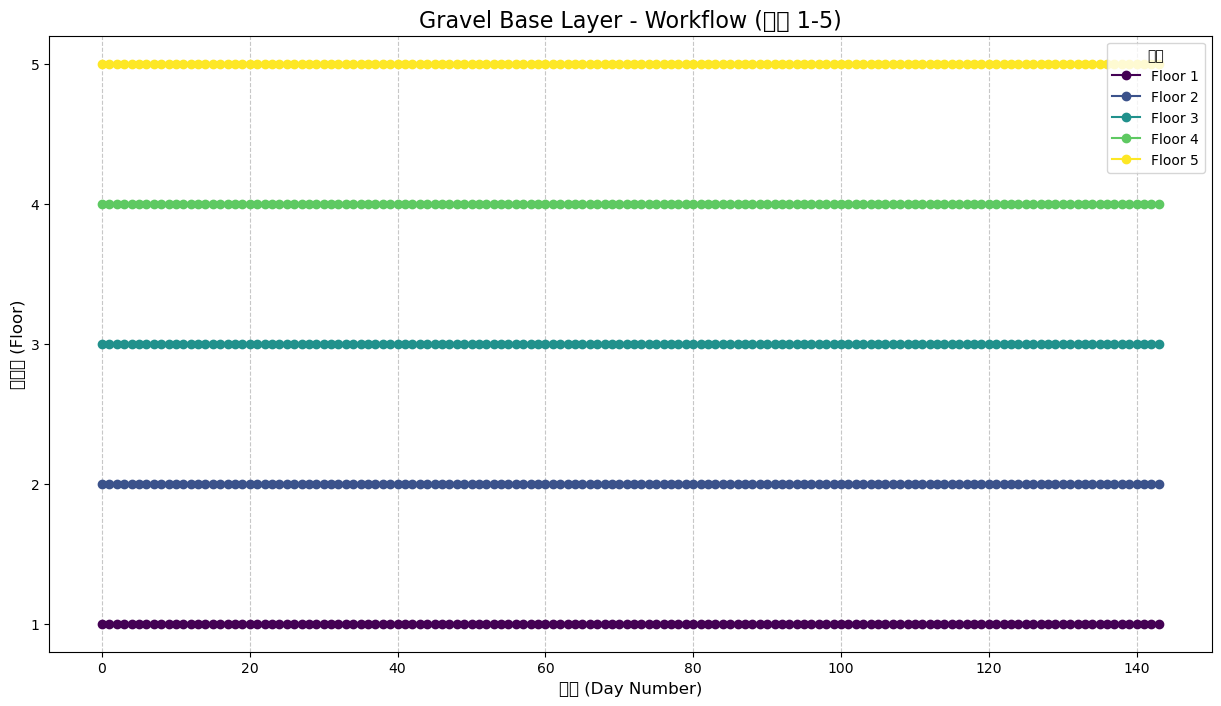

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Ensure pandas is imported if running in a new session
import matplotlib.colors as mcolors # For distinct colors

# --- 数据准备 ---
# 假设 'df' DataFrame 已在之前的单元格中加载

# 1. 筛选 'process' 列为 'Gravel base layer' 的数据
gravel_df = df[df['process'] == 'Gravel base layer'].copy()

# 2. 筛选 'floor' 列为 1 到 5 的数据
gravel_df = gravel_df[gravel_df['floor'].isin(range(1, 6))]

# 3. 确保 'day_number' 是数值类型并按楼层和天数排序
gravel_df['day_number'] = pd.to_numeric(gravel_df['day_number'], errors='coerce')
gravel_df.dropna(subset=['day_number', 'floor'], inplace=True) # 确保关键列无缺失值
gravel_df['floor'] = gravel_df['floor'].astype(int) # 确保楼层是整数
gravel_df.sort_values(by=['floor', 'day_number'], inplace=True)

# --- 可视化 Workflow ---
plt.figure(figsize=(15, 8)) # 设置图形大小

floors = sorted(gravel_df['floor'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(floors))) # 为不同楼层获取不同的颜色

# 为每个楼层绘制工作流程线
for i, floor in enumerate(floors):
    # 选择当前楼层的数据
    floor_data = gravel_df[gravel_df['floor'] == floor]

    # 绘制连接该楼层工作日的线，并添加标记点
    plt.plot(floor_data['day_number'], floor_data['floor'],
             marker='o',          # 在每个工作日添加圆形标记
             linestyle='-',       # 使用实线连接标记
             color=colors[i],     # 为该楼层分配颜色
             label=f'Floor {floor}') # 添加图例标签

# 添加标题和标签
plt.title('Gravel Base Layer - Workflow (楼层 1-5)', fontsize=16)
plt.xlabel('天数 (Day Number)', fontsize=12)
plt.ylabel('楼层数 (Floor)', fontsize=12)

# 设置 Y 轴刻度为整数楼层
plt.yticks(floors) # 确保 Y 轴只显示存在的楼层号

# 添加图例，显示每个颜色对应的楼层
plt.legend(title='楼层')

# 添加网格线以便于阅读（沿 X 轴可能更有用）
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# 显示图形
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_35360\1255458283.py:78: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_35360\1255458283.py:78: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_35360\1255458283.py:78: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_35360\1255458283.py:78: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_35360\1255458283.py:78: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_35360\1255458283.py:78: UserWarning: Glyph 30340 (\N{CJK 

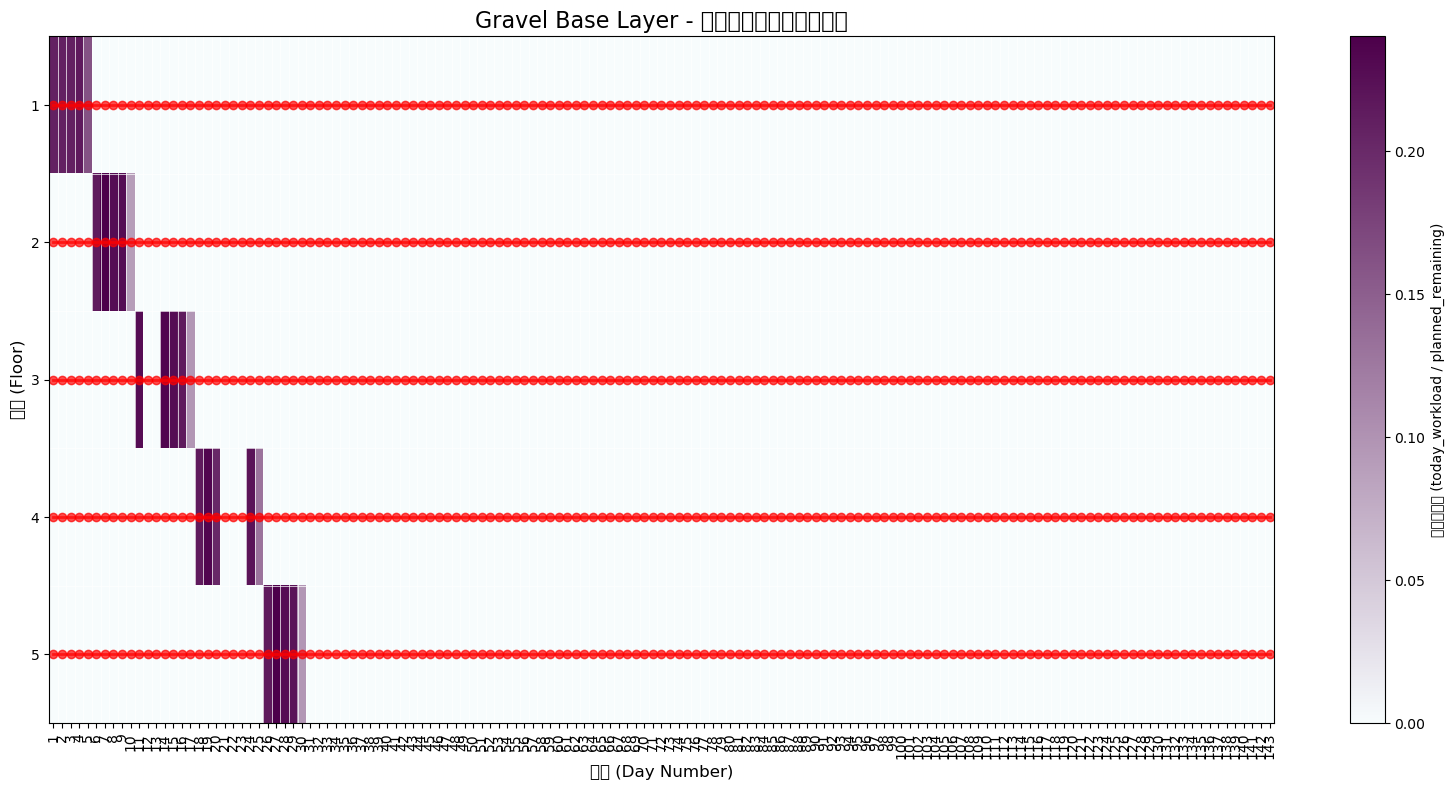

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# --- 数据准备 ---
# 假设 'df' DataFrame 已在之前的单元格中加载

# 1. 筛选 'process' 列为 'Gravel base layer' 的数据
gravel_df = df[df['process'] == 'Gravel base layer'].copy()

# 2. 筛选 'floor' 列为 1 到 5 的数据
gravel_df = gravel_df[gravel_df['floor'].isin(range(1, 6))]

# 3. 计算每日工作量比例 (today_workload / planned_remaining)
gravel_df['planned_remaining_safe'] = gravel_df['planned_remaining'].replace(0, np.nan)
gravel_df['workload_ratio'] = gravel_df['today_workload'] / gravel_df['planned_remaining_safe']

# 4. 确保 'day_number' 是数值类型并按楼层和天数排序
gravel_df['day_number'] = pd.to_numeric(gravel_df['day_number'], errors='coerce')
gravel_df.dropna(subset=['day_number', 'floor', 'workload_ratio'], inplace=True)
gravel_df['floor'] = gravel_df['floor'].astype(int)

# 5. 数据透视表，创建 floor x day_number 的矩阵，值为workload_ratio
pivot_data = gravel_df.pivot_table(
    index='floor', 
    columns='day_number', 
    values='workload_ratio',
    aggfunc='first'  # 如果有重复值，取第一个
)

# --- 可视化 ---
fig, ax = plt.subplots(figsize=(16, 8))

# 定义渐变色映射，从浅色到深色表示工作量比例
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#f7fcfd', '#4d004b'], N=256)

# 绘制热力图
im = ax.imshow(pivot_data, cmap=cmap, aspect='auto', interpolation='nearest')

# 添加坐标轴标签和网格
ax.set_yticks(range(len(pivot_data.index)))
ax.set_yticklabels(pivot_data.index)
ax.set_xticks(range(len(pivot_data.columns)))
ax.set_xticklabels(pivot_data.columns, rotation=90 if len(pivot_data.columns) > 10 else 0)

# 添加颜色条
cbar = plt.colorbar(im, ax=ax, label='工作量比例 (today_workload / planned_remaining)')

# 添加标题和轴标签
plt.title('Gravel Base Layer - 每层楼每天的工作量比例', fontsize=16)
plt.xlabel('天数 (Day Number)', fontsize=12)
plt.ylabel('楼层 (Floor)', fontsize=12)

# 添加网格线
for i in range(len(pivot_data.index) - 1):
    plt.axhline(i + 0.5, color='white', linestyle='-', linewidth=0.5)
for i in range(len(pivot_data.columns) - 1):
    plt.axvline(i + 0.5, color='white', linestyle='-', linewidth=0.5)

# --- 添加工作流程线 ---
# 另一种方式可视化工作流程：连接每层楼的工作日

# 获取每层楼的所有工作日
for floor in sorted(gravel_df['floor'].unique()):
    # 获取该楼层的所有天数
    days = sorted(gravel_df[gravel_df['floor'] == floor]['day_number'].unique())
    
    # 将天数转换为热力图中的x坐标（列索引）
    x_indices = [pivot_data.columns.get_loc(day) for day in days if day in pivot_data.columns]
    y_indices = [pivot_data.index.get_loc(floor)] * len(x_indices)
    
    if len(x_indices) > 1:  # 至少需要两个点才能连线
        # 在热力图上方叠加工作流程线
        plt.plot(x_indices, y_indices, 'o-', color='red', alpha=0.7, linewidth=2, markersize=6)

plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_35360\338962560.py:110: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_35360\338962560.py:110: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_35360\338962560.py:110: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_35360\338962560.py:110: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_35360\338962560.py:110: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_35360\338962560.py:110: UserWarning: Glyph 20316 (\N{CJK 

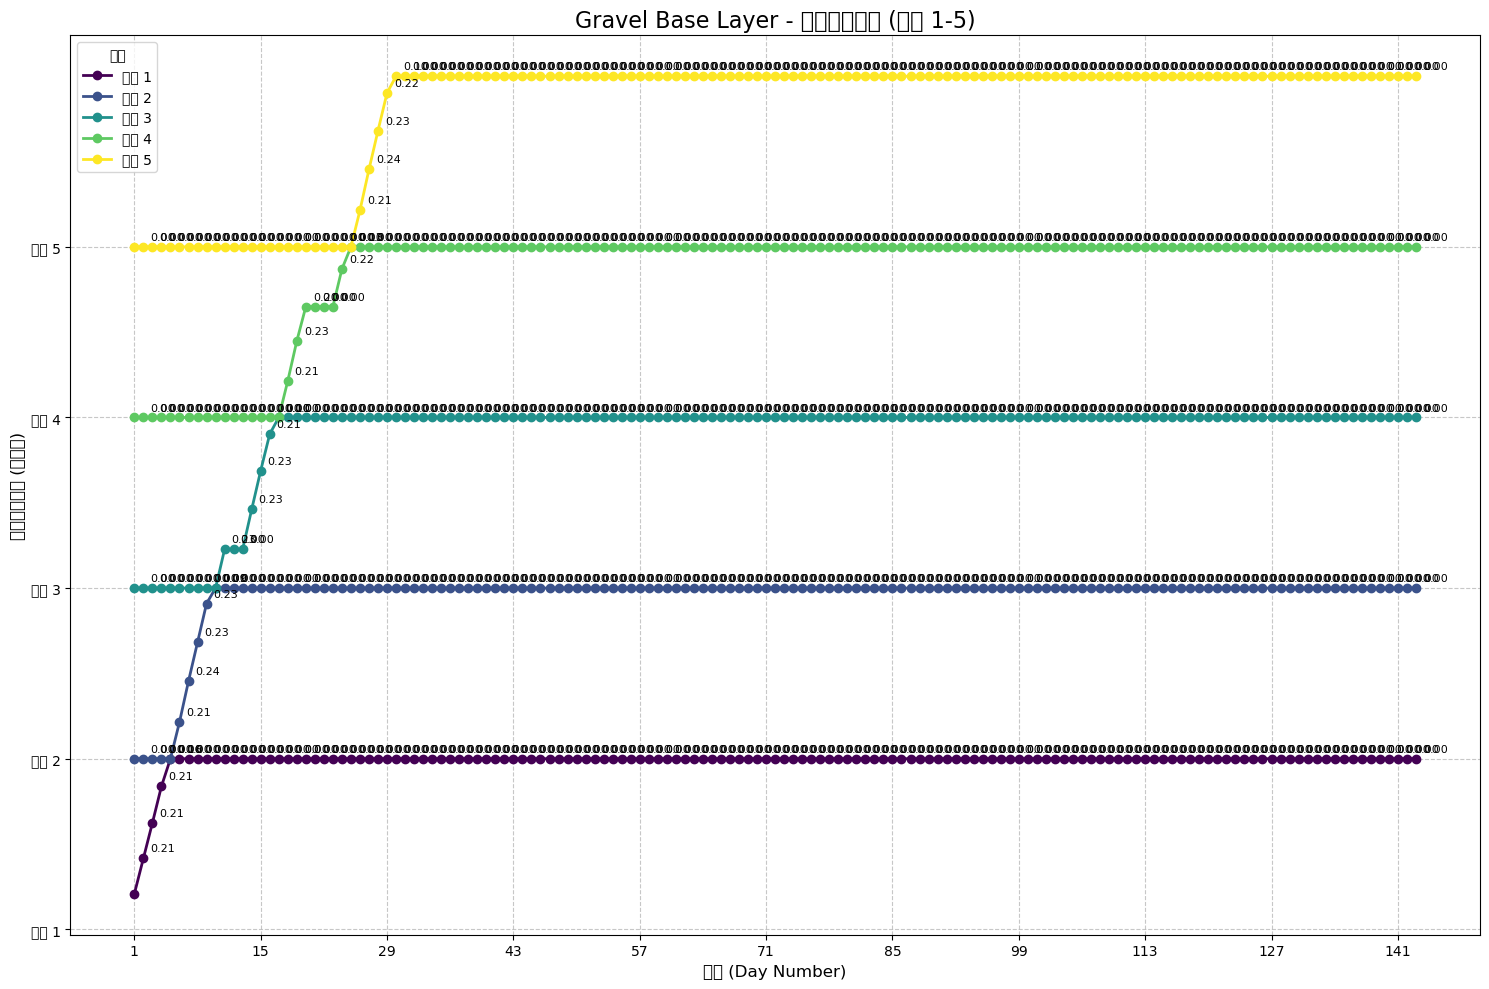

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

# --- 数据准备 ---
# 假设 'df' DataFrame 已在之前的单元格中加载

# 1. 筛选 'process' 列为 'Gravel base layer' 的数据
gravel_df = df[df['process'] == 'Gravel base layer'].copy()

# 2. 筛选 'floor' 列为 1 到 5 的数据
gravel_df = gravel_df[gravel_df['floor'].isin(range(1, 6))]

# 3. 计算每日工作量比例 (today_workload / planned_remaining)
gravel_df['planned_remaining_safe'] = gravel_df['planned_remaining'].replace(0, np.nan)
gravel_df['workload_ratio'] = gravel_df['today_workload'] / gravel_df['planned_remaining_safe']

# 4. 确保 'day_number' 是数值类型并按楼层和天数排序
gravel_df['day_number'] = pd.to_numeric(gravel_df['day_number'], errors='coerce')
gravel_df.dropna(subset=['day_number', 'floor', 'workload_ratio'], inplace=True)
gravel_df['floor'] = gravel_df['floor'].astype(int)
gravel_df.sort_values(by=['floor', 'day_number'], inplace=True)

# --- 可视化 ---
plt.figure(figsize=(15, 10))

# 设置颜色映射
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # 为5个楼层分配颜色

# 初始化累计高度的字典，记录每层楼的累计工作量
cumulative_height = {}
for floor in range(1, 6):
    cumulative_height[floor] = 0

# 绘制每个楼层的工作流线
for floor in range(1, 6):
    # 获取当前楼层的数据
    floor_data = gravel_df[gravel_df['floor'] == floor].copy()
    
    if len(floor_data) > 0:
        # 基础高度设置为 floor-1 (使第1层从0开始，第2层从1开始，依此类推)
        base_height = floor - 1
        
        # 初始化该楼层的工作量线条点
        x_values = []
        y_values = []
        
        # 获取该层的所有天数
        days = sorted(floor_data['day_number'].unique())
        
        # 对每一天进行处理
        for day in days:
            # 获取当天数据
            day_data = floor_data[floor_data['day_number'] == day]
            ratio = day_data['workload_ratio'].iloc[0]
            
            # 添加点坐标
            x_values.append(day)
            
            # 计算高度：基础高度 + 累计工作量
            cumulative_height[floor] += ratio  # 累加工作量比例
            height = base_height + min(cumulative_height[floor], 1)  # 限制高度不超过下一层
            
            y_values.append(height)
        
        # 绘制工作量线
        plt.plot(x_values, y_values, '-o', 
                 color=colors[floor-1], 
                 linewidth=2, 
                 markersize=6,
                 label=f'楼层 {floor}')
        
        # 在每个点上标注工作量比例
        for i, (x, y) in enumerate(zip(x_values, y_values)):
            if i > 0:  # 计算斜率
                dx = x - x_values[i-1]
                dy = y - y_values[i-1]
                if dx > 0:  # 避免除以零
                    slope = dy / dx
                    plt.annotate(f'{slope:.2f}', 
                                 xy=(x, y),
                                 xytext=(5, 5),
                                 textcoords='offset points',
                                 fontsize=8)

# 添加标题和标签
plt.title('Gravel Base Layer - 工作进度流程 (楼层 1-5)', fontsize=16)
plt.xlabel('天数 (Day Number)', fontsize=12)
plt.ylabel('工作进度累计 (按楼层)', fontsize=12)

# 设置Y轴刻度，每层楼之间留有空间
plt.yticks(range(5), ['楼层 1', '楼层 2', '楼层 3', '楼层 4', '楼层 5'])

# 添加图例
plt.legend(title='楼层', loc='upper left')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 设置X轴只显示关键天数点，避免过于拥挤
unique_days = sorted(gravel_df['day_number'].unique())
if len(unique_days) > 10:
    # 如果天数过多，只显示部分
    step = max(1, len(unique_days) // 10)
    plt.xticks(unique_days[::step])
else:
    plt.xticks(unique_days)

plt.tight_layout()
plt.show()

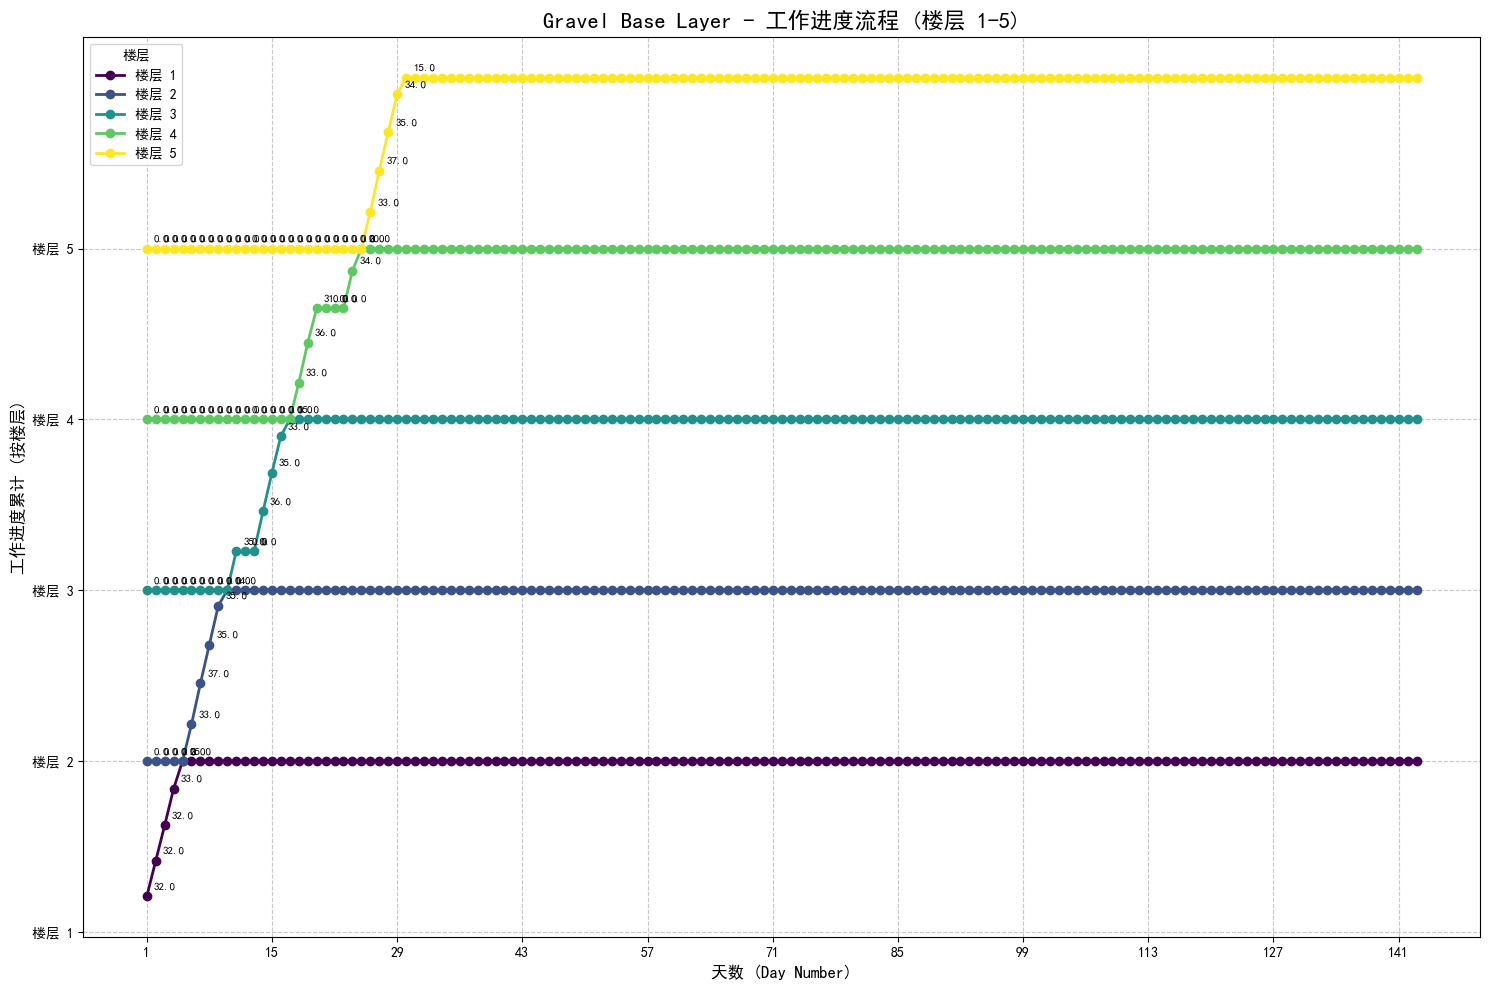

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# --- 数据准备 ---
# 假设 'df' DataFrame 已在之前的单元格中加载

# 1. 筛选 'process' 列为 'Gravel base layer' 的数据
gravel_df = df[df['process'] == 'Gravel base layer'].copy()

# 2. 筛选 'floor' 列为 1 到 5 的数据
gravel_df = gravel_df[gravel_df['floor'].isin(range(1, 6))]

# 3. 计算每日工作量比例 (today_workload / planned_remaining)
gravel_df['planned_remaining_safe'] = gravel_df['planned_remaining'].replace(0, np.nan)
gravel_df['workload_ratio'] = gravel_df['today_workload'] / gravel_df['planned_remaining_safe']

# 4. 确保 'day_number' 是数值类型并按楼层和天数排序
gravel_df['day_number'] = pd.to_numeric(gravel_df['day_number'], errors='coerce')
gravel_df.dropna(subset=['day_number', 'floor', 'workload_ratio'], inplace=True)
gravel_df['floor'] = gravel_df['floor'].astype(int)
gravel_df.sort_values(by=['floor', 'day_number'], inplace=True)

# --- 可视化 ---
plt.figure(figsize=(15, 10))

# 设置颜色映射
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # 为5个楼层分配颜色

# 初始化累计高度的字典，记录每层楼的累计工作量
cumulative_height = {}
for floor in range(1, 6):
    cumulative_height[floor] = 0

# 绘制每个楼层的工作流线
for floor in range(1, 6):
    # 获取当前楼层的数据
    floor_data = gravel_df[gravel_df['floor'] == floor].copy()
    
    if len(floor_data) > 0:
        # 基础高度设置为 floor-1 (使第1层从0开始，第2层从1开始，依此类推)
        base_height = floor - 1
        
        # 初始化该楼层的工作量线条点
        x_values = []
        y_values = []
        
        # 获取该层的所有天数
        days = sorted(floor_data['day_number'].unique())
        
        # 对每一天进行处理
        for day in days:
            # 获取当天数据
            day_data = floor_data[floor_data['day_number'] == day]
            ratio = day_data['workload_ratio'].iloc[0]
            today_work = day_data['today_workload'].iloc[0]
            
            # 添加点坐标
            x_values.append(day)
            
            # 计算高度：基础高度 + 累计工作量
            cumulative_height[floor] += ratio  # 累加工作量比例
            height = base_height + min(cumulative_height[floor], 1)  # 限制高度不超过下一层
            
            y_values.append(height)
        
        # 绘制工作量线
        plt.plot(x_values, y_values, '-o', 
                 color=colors[floor-1], 
                 linewidth=2, 
                 markersize=6,
                 label=f'楼层 {floor}')
        
        # 在每个点上标注实际工作量(today_workload)
        is_complete = False  # 跟踪是否已完成
        for i, (x, y) in enumerate(zip(x_values, y_values)):
            day_data = floor_data[floor_data['day_number'] == x]
            today_work = day_data['today_workload'].iloc[0]
            
            # 检查是否已经完成（当累计高度接近1时）
            current_progress = y - (floor - 1)
            
            # 只有在任务未完成时才标注工作量
            if not is_complete:
                plt.annotate(f'{today_work:.1f}', 
                             xy=(x, y),
                             xytext=(5, 5),
                             textcoords='offset points',
                             fontsize=8)
                
                # 如果当前进度接近1，标记为已完成
                if current_progress >= 0.95:  # 假设进度大于95%视为完成
                    is_complete = True

# 添加标题和标签
plt.title('Gravel Base Layer - 工作进度流程 (楼层 1-5)', fontsize=16)
plt.xlabel('天数 (Day Number)', fontsize=12)
plt.ylabel('工作进度累计 (按楼层)', fontsize=12)

# 设置Y轴刻度，每层楼之间留有空间
plt.yticks(range(5), ['楼层 1', '楼层 2', '楼层 3', '楼层 4', '楼层 5'])

# 添加图例
plt.legend(title='楼层', loc='upper left')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 设置X轴只显示关键天数点，避免过于拥挤
unique_days = sorted(gravel_df['day_number'].unique())
if len(unique_days) > 10:
    # 如果天数过多，只显示部分
    step = max(1, len(unique_days) // 10)
    plt.xticks(unique_days[::step])
else:
    plt.xticks(unique_days)

plt.tight_layout()
plt.show()

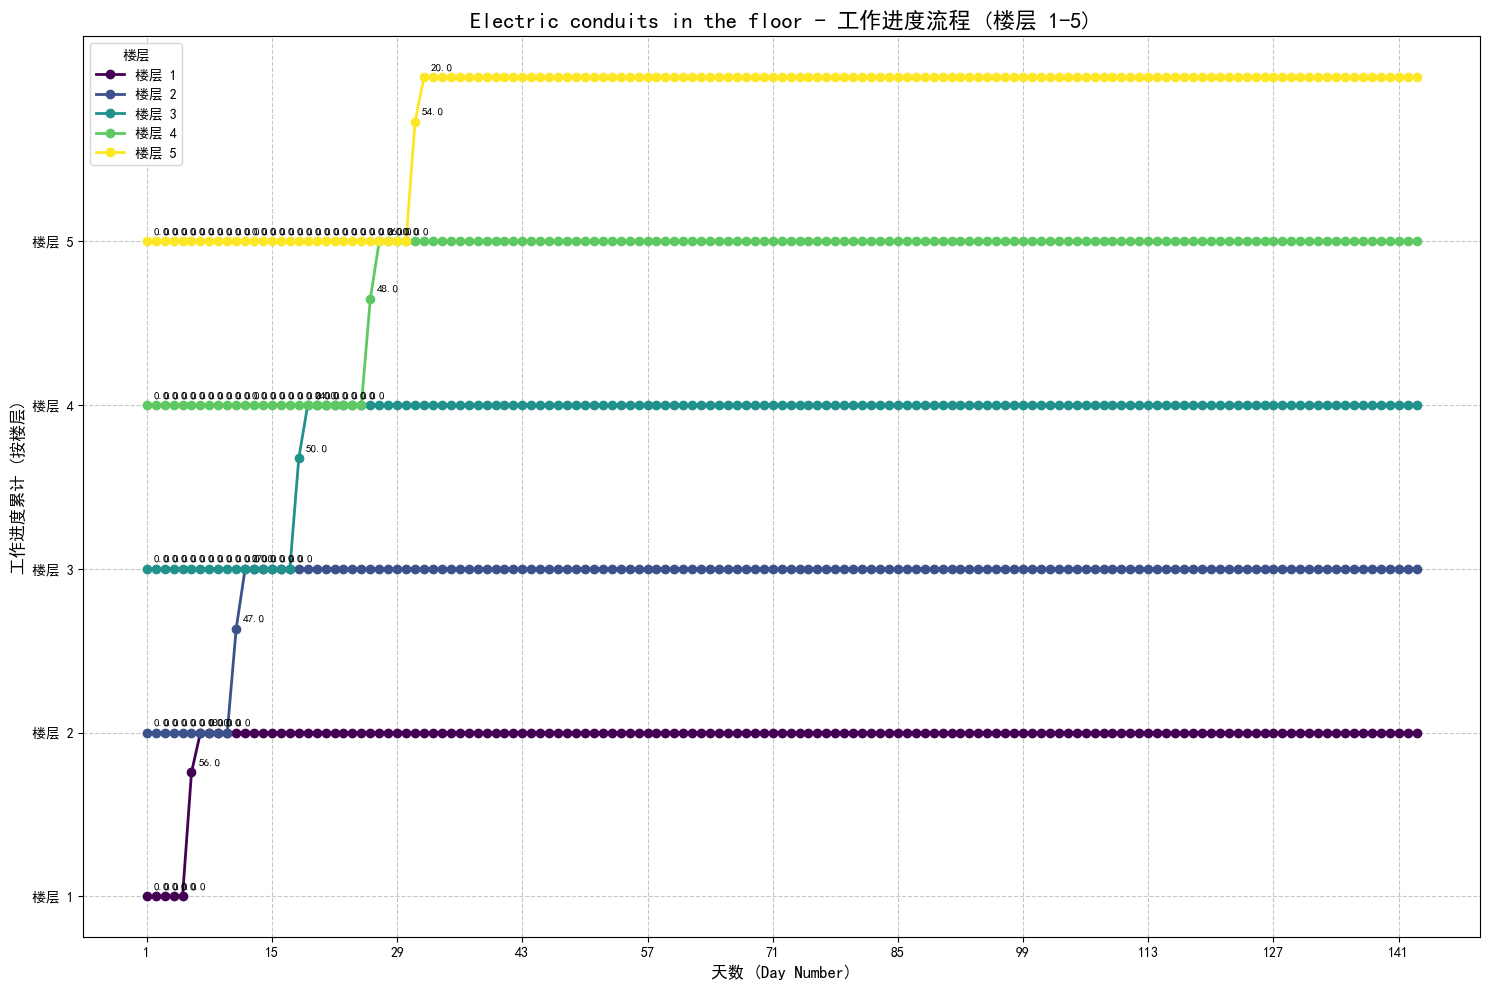

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# --- 数据准备 ---
# 假设 'df' DataFrame 已在之前的单元格中加载

# 1. 筛选 'process' 列为 'Electric conduits in the floor' 的数据
electric_df = df[df['process'] == 'Electric conduits in the floor'].copy()

# 2. 筛选 'floor' 列为 1 到 5 的数据
electric_df = electric_df[electric_df['floor'].isin(range(1, 6))]

# 3. 计算每日工作量比例 (today_workload / planned_remaining)
electric_df['planned_remaining_safe'] = electric_df['planned_remaining'].replace(0, np.nan)
electric_df['workload_ratio'] = electric_df['today_workload'] / electric_df['planned_remaining_safe']

# 4. 确保 'day_number' 是数值类型并按楼层和天数排序
electric_df['day_number'] = pd.to_numeric(electric_df['day_number'], errors='coerce')
electric_df.dropna(subset=['day_number', 'floor', 'workload_ratio'], inplace=True)
electric_df['floor'] = electric_df['floor'].astype(int)
electric_df.sort_values(by=['floor', 'day_number'], inplace=True)

# --- 可视化 ---
plt.figure(figsize=(15, 10))

# 设置颜色映射
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # 为5个楼层分配颜色

# 初始化累计高度的字典，记录每层楼的累计工作量
cumulative_height = {}
for floor in range(1, 6):
    cumulative_height[floor] = 0

# 绘制每个楼层的工作流线
for floor in range(1, 6):
    # 获取当前楼层的数据
    floor_data = electric_df[electric_df['floor'] == floor].copy()
    
    if len(floor_data) > 0:
        # 基础高度设置为 floor-1 (使第1层从0开始，第2层从1开始，依此类推)
        base_height = floor - 1
        
        # 初始化该楼层的工作量线条点
        x_values = []
        y_values = []
        
        # 获取该层的所有天数
        days = sorted(floor_data['day_number'].unique())
        
        # 对每一天进行处理
        for day in days:
            # 获取当天数据
            day_data = floor_data[floor_data['day_number'] == day]
            ratio = day_data['workload_ratio'].iloc[0]
            today_work = day_data['today_workload'].iloc[0]
            
            # 添加点坐标
            x_values.append(day)
            
            # 计算高度：基础高度 + 累计工作量
            cumulative_height[floor] += ratio  # 累加工作量比例
            height = base_height + min(cumulative_height[floor], 1)  # 限制高度不超过下一层
            
            y_values.append(height)
        
        # 绘制工作量线
        plt.plot(x_values, y_values, '-o', 
                 color=colors[floor-1], 
                 linewidth=2, 
                 markersize=6,
                 label=f'楼层 {floor}')
        
        # 在每个点上标注实际工作量(today_workload)
        is_complete = False  # 跟踪是否已完成
        for i, (x, y) in enumerate(zip(x_values, y_values)):
            day_data = floor_data[floor_data['day_number'] == x]
            today_work = day_data['today_workload'].iloc[0]
            
            # 检查是否已经完成（当累计高度接近1时）
            current_progress = y - (floor - 1)
            
            # 只有在任务未完成时才标注工作量
            if not is_complete:
                plt.annotate(f'{today_work:.1f}', 
                             xy=(x, y),
                             xytext=(5, 5),
                             textcoords='offset points',
                             fontsize=8)
                
                # 如果当前进度接近1，标记为已完成
                if current_progress >= 0.95:  # 假设进度大于95%视为完成
                    is_complete = True

# 添加标题和标签
plt.title('Electric conduits in the floor - 工作进度流程 (楼层 1-5)', fontsize=16)
plt.xlabel('天数 (Day Number)', fontsize=12)
plt.ylabel('工作进度累计 (按楼层)', fontsize=12)

# 设置Y轴刻度，每层楼之间留有空间
plt.yticks(range(5), ['楼层 1', '楼层 2', '楼层 3', '楼层 4', '楼层 5'])

# 添加图例
plt.legend(title='楼层', loc='upper left')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 设置X轴只显示关键天数点，避免过于拥挤
unique_days = sorted(electric_df['day_number'].unique())
if len(unique_days) > 10:
    # 如果天数过多，只显示部分
    step = max(1, len(unique_days) // 10)
    plt.xticks(unique_days[::step])
else:
    plt.xticks(unique_days)

plt.tight_layout()
plt.show()

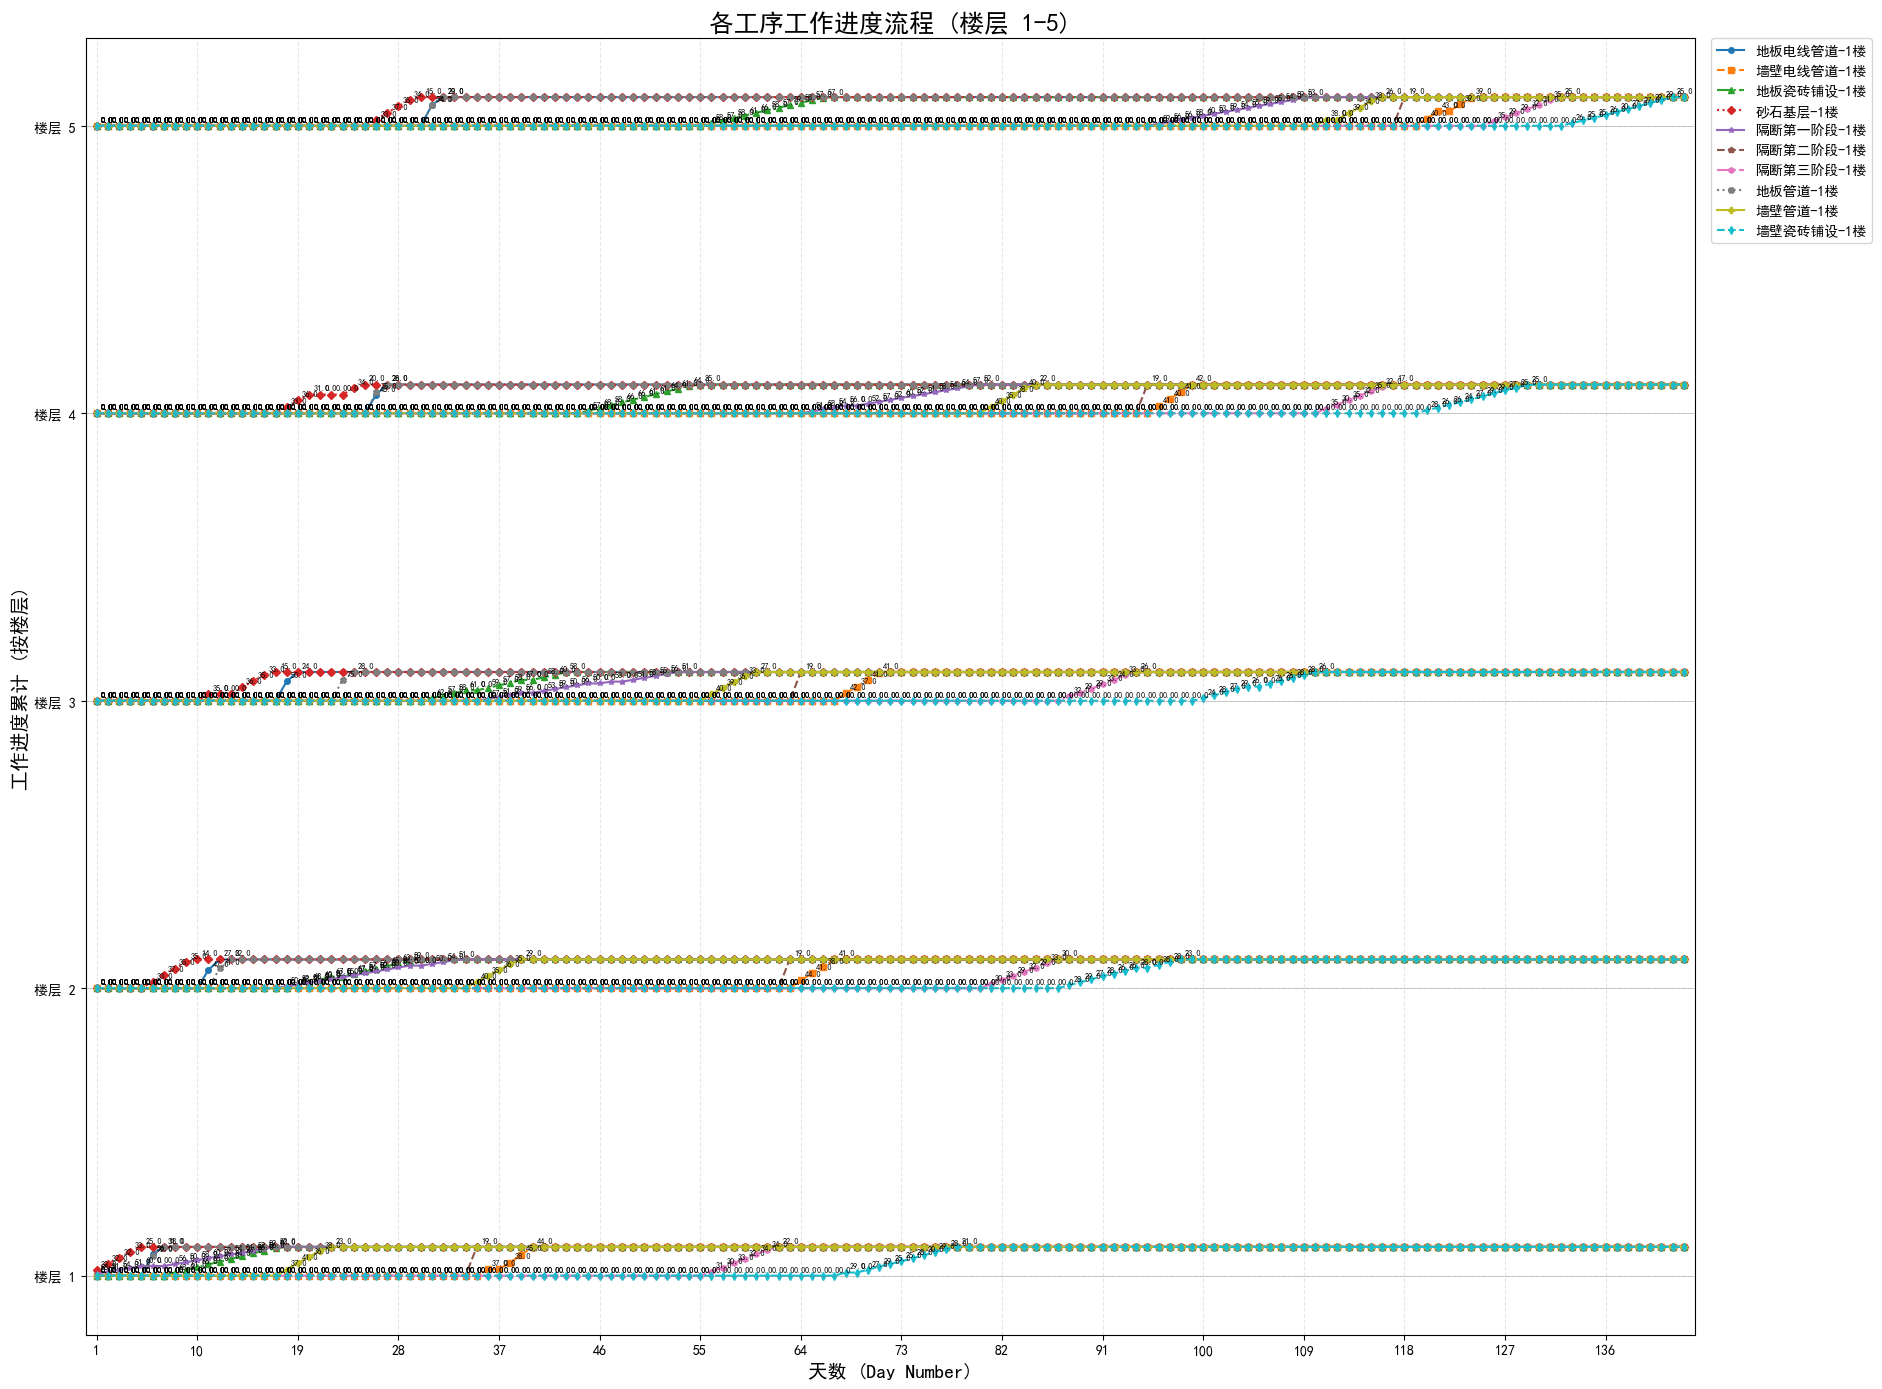

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from cycler import cycler

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# --- 数据准备 ---
# 假设 'df' DataFrame 已在之前的单元格中加载

# 1. 定义所有需要绘制的工序
processes = [
    'Electric conduits in the floor',
    'Electric conduits in the wall',
    'Floor tiling',
    'Gravel base layer',
    'Partition phase 1',
    'Partition phase 2',
    'Partition phase 3',
    'Pipes in the floor',
    'Pipes in the wall',
    'Wall tiling'
]

# 2. 中文对应表（用于图例和标题显示）
process_names_cn = {
    'Electric conduits in the floor': '地板电线管道',
    'Electric conduits in the wall': '墙壁电线管道',
    'Floor tiling': '地板瓷砖铺设',
    'Gravel base layer': '砂石基层',
    'Partition phase 1': '隔断第一阶段',
    'Partition phase 2': '隔断第二阶段',
    'Partition phase 3': '隔断第三阶段',
    'Pipes in the floor': '地板管道',
    'Pipes in the wall': '墙壁管道',
    'Wall tiling': '墙壁瓷砖铺设'
}

# 创建一个更大的图表用于容纳所有工序
plt.figure(figsize=(20, 14))

# 使用更多的不同颜色，确保每个工序有独特的颜色
# 使用两种颜色方案组合，以确保有足够的不同颜色
color_schemes = []
color_schemes.extend(plt.cm.tab10(np.linspace(0, 1, 10)))
color_schemes.extend(plt.cm.Set2(np.linspace(0, 1, 8)))

# 设置线条样式循环器，增加图形区分度
line_styles = ['-', '--', '-.', ':']
line_cycler = cycler(linestyle=line_styles)

# 每个工序使用不同的标记，增加可辨识度
markers = ['o', 's', '^', 'D', '*', 'p', 'h', 'X', 'P', 'd']

# 保存所有工序的最大和最小天数，用于设置x轴范围
all_days = []

# 为了区分楼层，我们给每个楼层设置一个基础高度
floor_base_heights = {
    1: 0, 
    2: 10, 
    3: 20, 
    4: 30, 
    5: 40
}

# 处理每个工序
for i, process in enumerate(processes):
    # 筛选当前工序数据
    process_df = df[df['process'] == process].copy()
    
    # 只保留1-5层的数据
    process_df = process_df[process_df['floor'].isin(range(1, 6))]
    
    if len(process_df) == 0:
        continue  # 如果没有数据，跳过此工序
    
    # 计算每日工作量比例 (today_workload / planned_remaining)
    process_df['planned_remaining_safe'] = process_df['planned_remaining'].replace(0, np.nan)
    process_df['workload_ratio'] = process_df['today_workload'] / process_df['planned_remaining_safe']
    
    # 确保 'day_number' 是数值类型并按楼层和天数排序
    process_df['day_number'] = pd.to_numeric(process_df['day_number'], errors='coerce')
    process_df.dropna(subset=['day_number', 'floor', 'workload_ratio'], inplace=True)
    process_df['floor'] = process_df['floor'].astype(int)
    process_df.sort_values(by=['floor', 'day_number'], inplace=True)
    
    # 收集此工序的所有天数
    days = process_df['day_number'].unique()
    all_days.extend(days)
    
    # 每个工序的颜色和线型
    process_color = color_schemes[i % len(color_schemes)]
    process_marker = markers[i % len(markers)]
    process_linestyle = line_styles[i % len(line_styles)]
    
    # 绘制每个楼层的工作流线
    for floor in range(1, 6):
        # 获取当前楼层的数据
        floor_data = process_df[process_df['floor'] == floor].copy()
        
        if len(floor_data) > 0:
            # 使用楼层的基础高度
            base_height = floor_base_heights[floor]
            
            # 初始化该楼层工序的累计工作量
            cumulative_work = 0
            
            # 初始化该楼层的工作量线条点
            x_values = []
            y_values = []
            
            # 获取该层工序的所有天数
            days = sorted(floor_data['day_number'].unique())
            
            # 对每一天进行处理
            for day in days:
                # 获取当天数据
                day_data = floor_data[floor_data['day_number'] == day]
                ratio = day_data['workload_ratio'].iloc[0]
                
                # 添加点坐标
                x_values.append(day)
                
                # 计算高度：基础高度 + 累计工作量
                cumulative_work += ratio  # 累加工作量比例
                height = base_height + min(cumulative_work, 1)  # 限制高度不超过1
                
                y_values.append(height)
            
            # 绘制工作量线
            plt.plot(x_values, y_values, 
                     marker=process_marker,
                     linestyle=process_linestyle,
                     color=process_color,
                     linewidth=1.5, 
                     markersize=4,
                     label=f'{process_names_cn[process]}-{floor}楼' if floor == 1 else "")
            
            # 在每个点上标注实际工作量(today_workload)
            is_complete = False  # 跟踪是否已完成
            for i, (x, y) in enumerate(zip(x_values, y_values)):
                day_data = floor_data[floor_data['day_number'] == x]
                today_work = day_data['today_workload'].iloc[0]
                
                # 检查是否已经完成（当累计高度接近1时）
                current_progress = cumulative_work if i == len(x_values) - 1 else (y - base_height)
                
                # 只有在任务未完成时才标注工作量
                if not is_complete:
                    plt.annotate(f'{today_work:.1f}', 
                                 xy=(x, y),
                                 xytext=(3, 3),
                                 textcoords='offset points',
                                 fontsize=6)
                    
                    # 如果当前进度接近1，标记为已完成
                    if current_progress >= 0.95:  # 假设进度大于95%视为完成
                        is_complete = True

# 添加标题和标签
plt.title('各工序工作进度流程 (楼层 1-5)', fontsize=18)
plt.xlabel('天数 (Day Number)', fontsize=14)
plt.ylabel('工作进度累计 (按楼层)', fontsize=14)

# 设置Y轴刻度，显示楼层分隔
plt.yticks([floor_base_heights[f] for f in range(1, 6)], 
           ['楼层 1', '楼层 2', '楼层 3', '楼层 4', '楼层 5'])

# 为不同楼层添加水平分隔线
for floor in range(1, 6):
    plt.axhline(y=floor_base_heights[floor], color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

# 添加图例，并放在图外以节省空间
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0, fontsize=10)

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.3)

# 设置X轴范围和刻度
min_day = min(all_days) if all_days else 0
max_day = max(all_days) if all_days else 100
plt.xlim(min_day-1, max_day+1)

# 如果天数太多，只显示部分刻度
if len(set(all_days)) > 15:
    step = max(1, len(set(all_days)) // 15)
    plt.xticks(sorted(set(all_days))[::step])
else:
    plt.xticks(sorted(set(all_days)))

# 调整布局，确保图例完全显示
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # 为图例留出空间

plt.show()

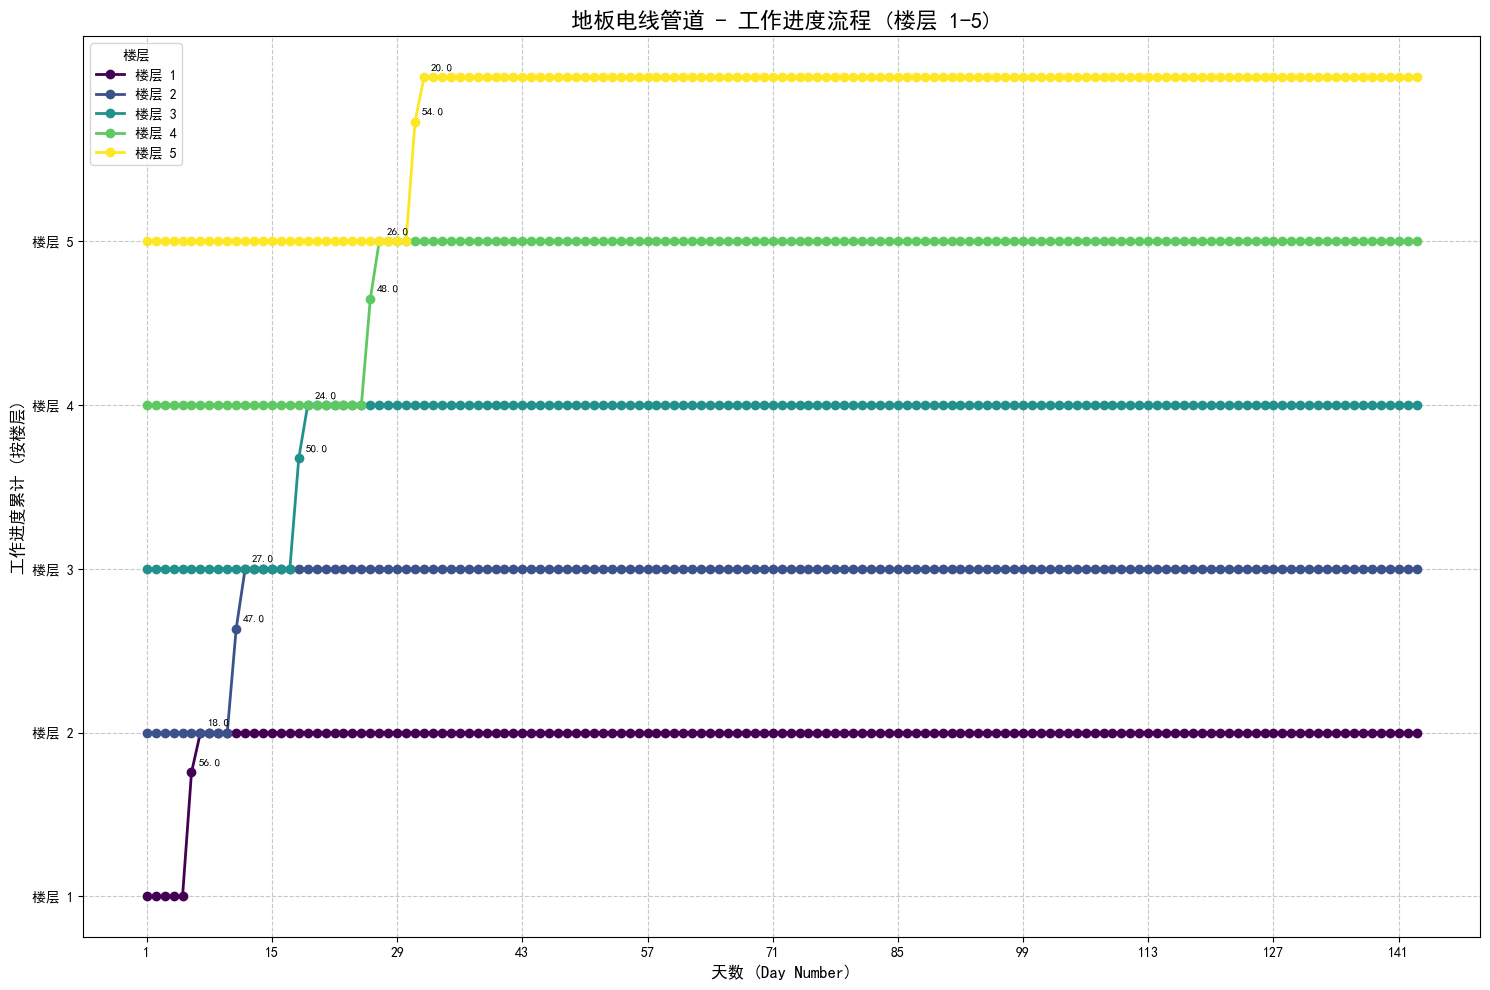

已完成绘制: 地板电线管道


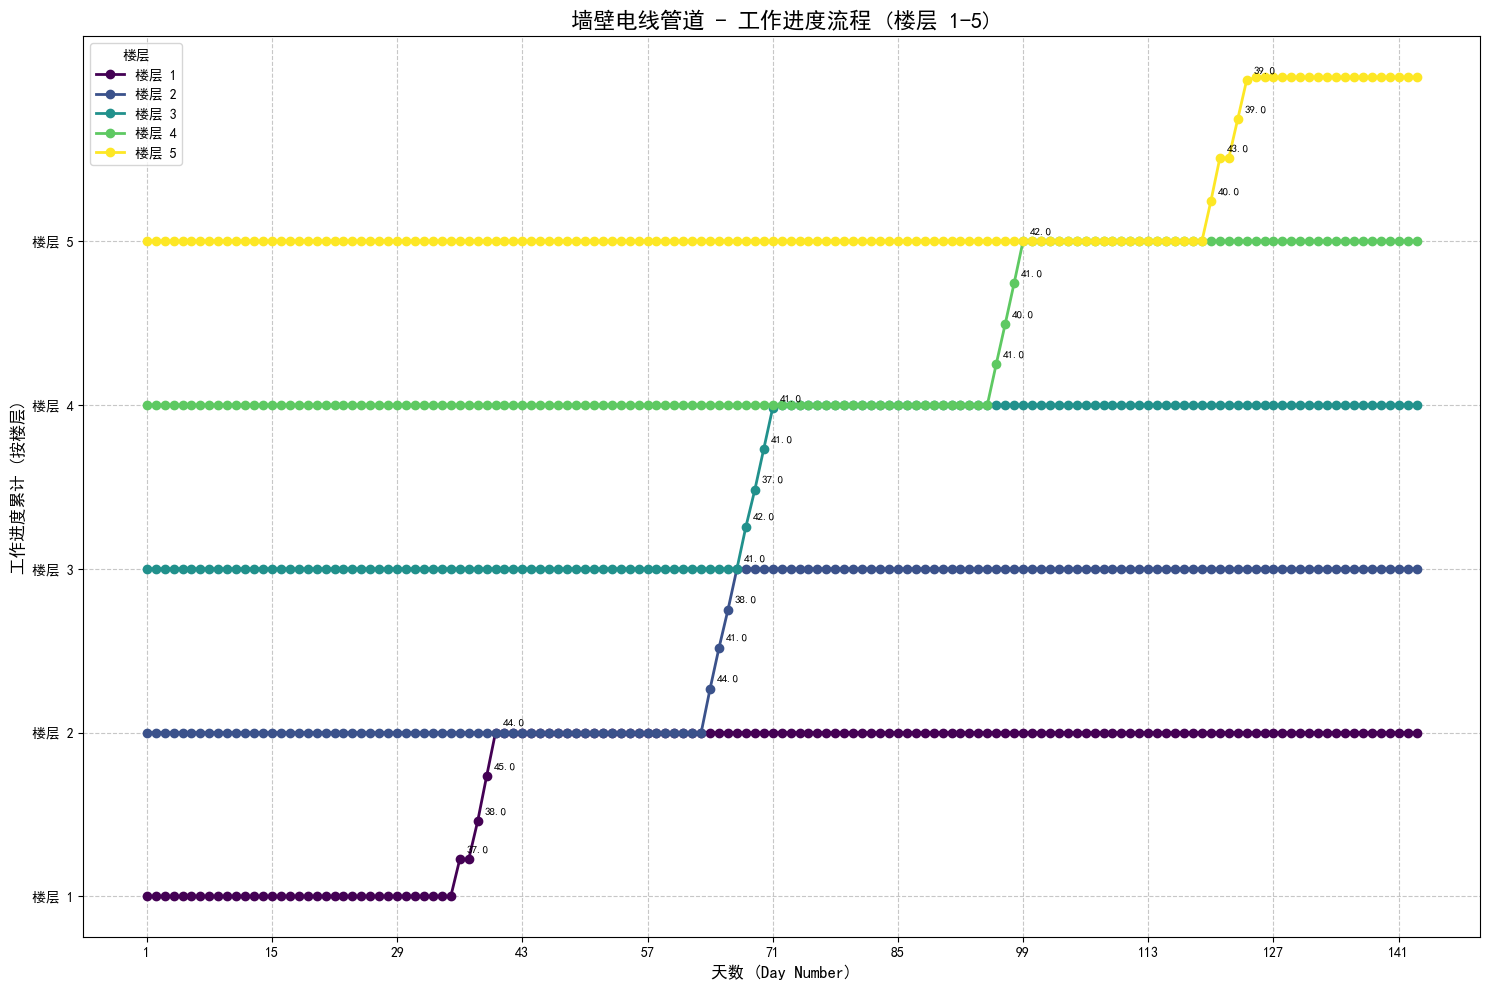

已完成绘制: 墙壁电线管道


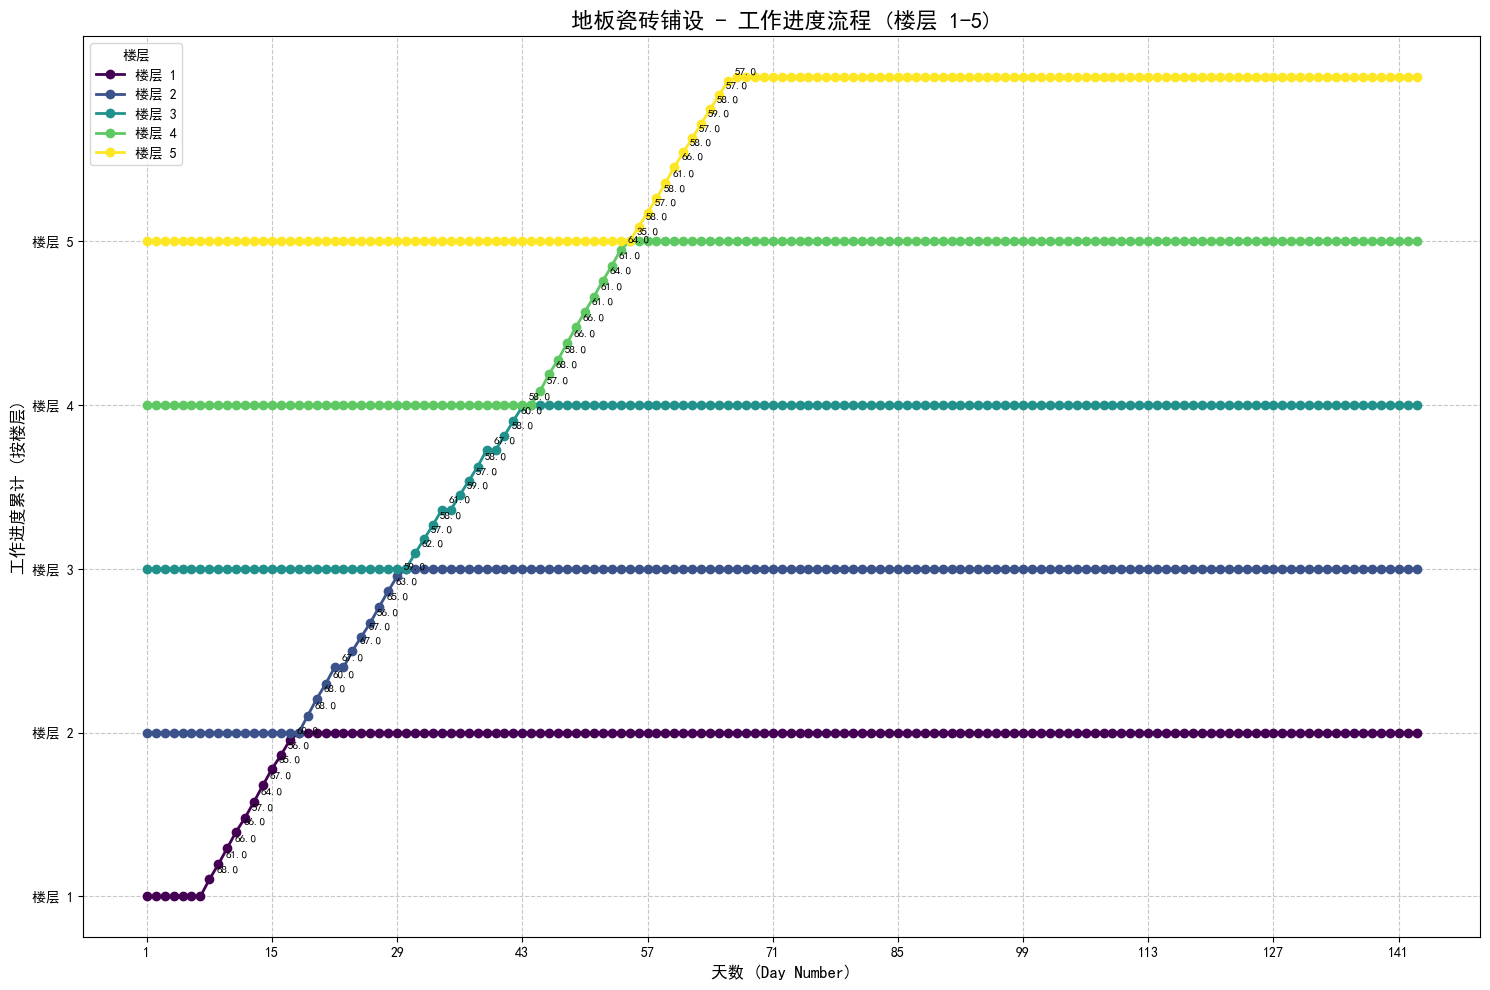

已完成绘制: 地板瓷砖铺设


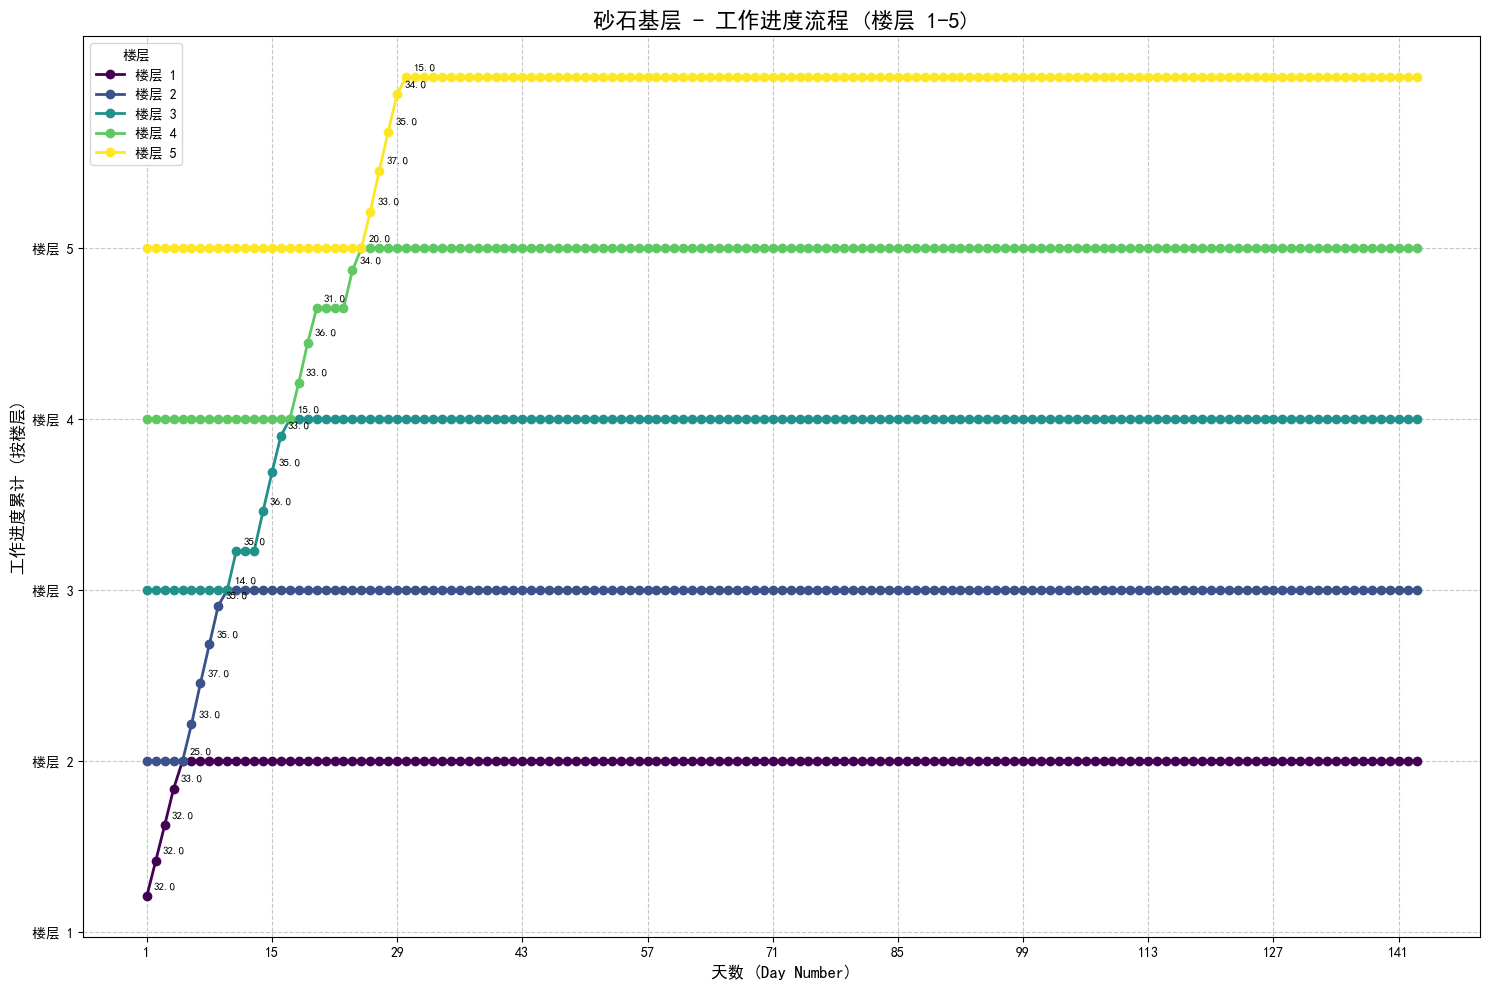

已完成绘制: 砂石基层


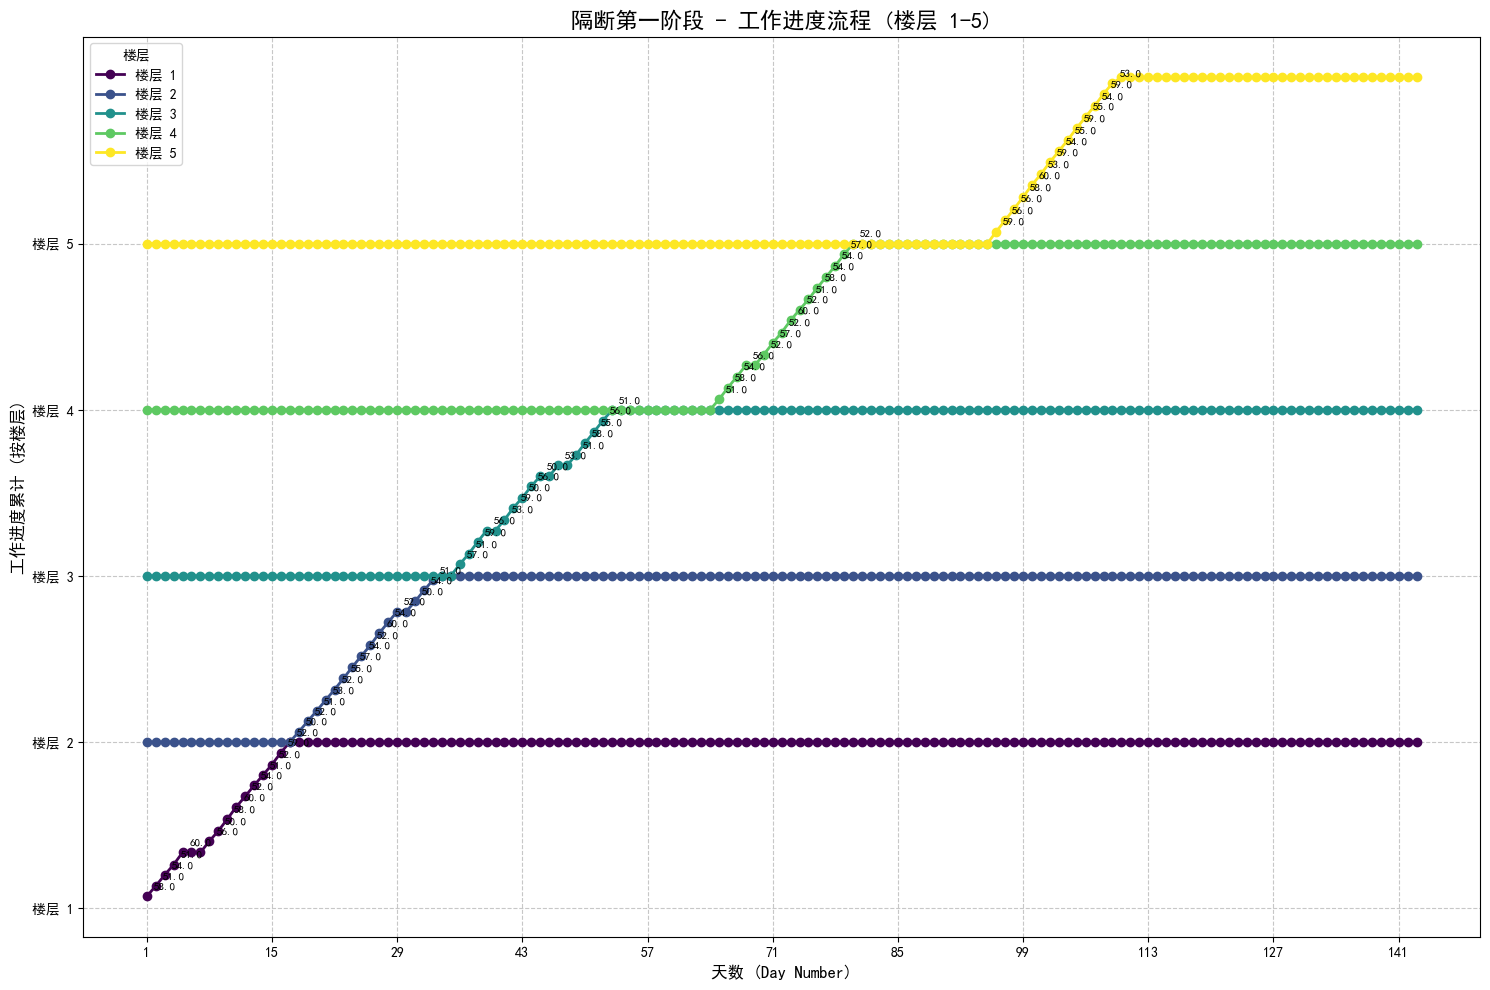

已完成绘制: 隔断第一阶段


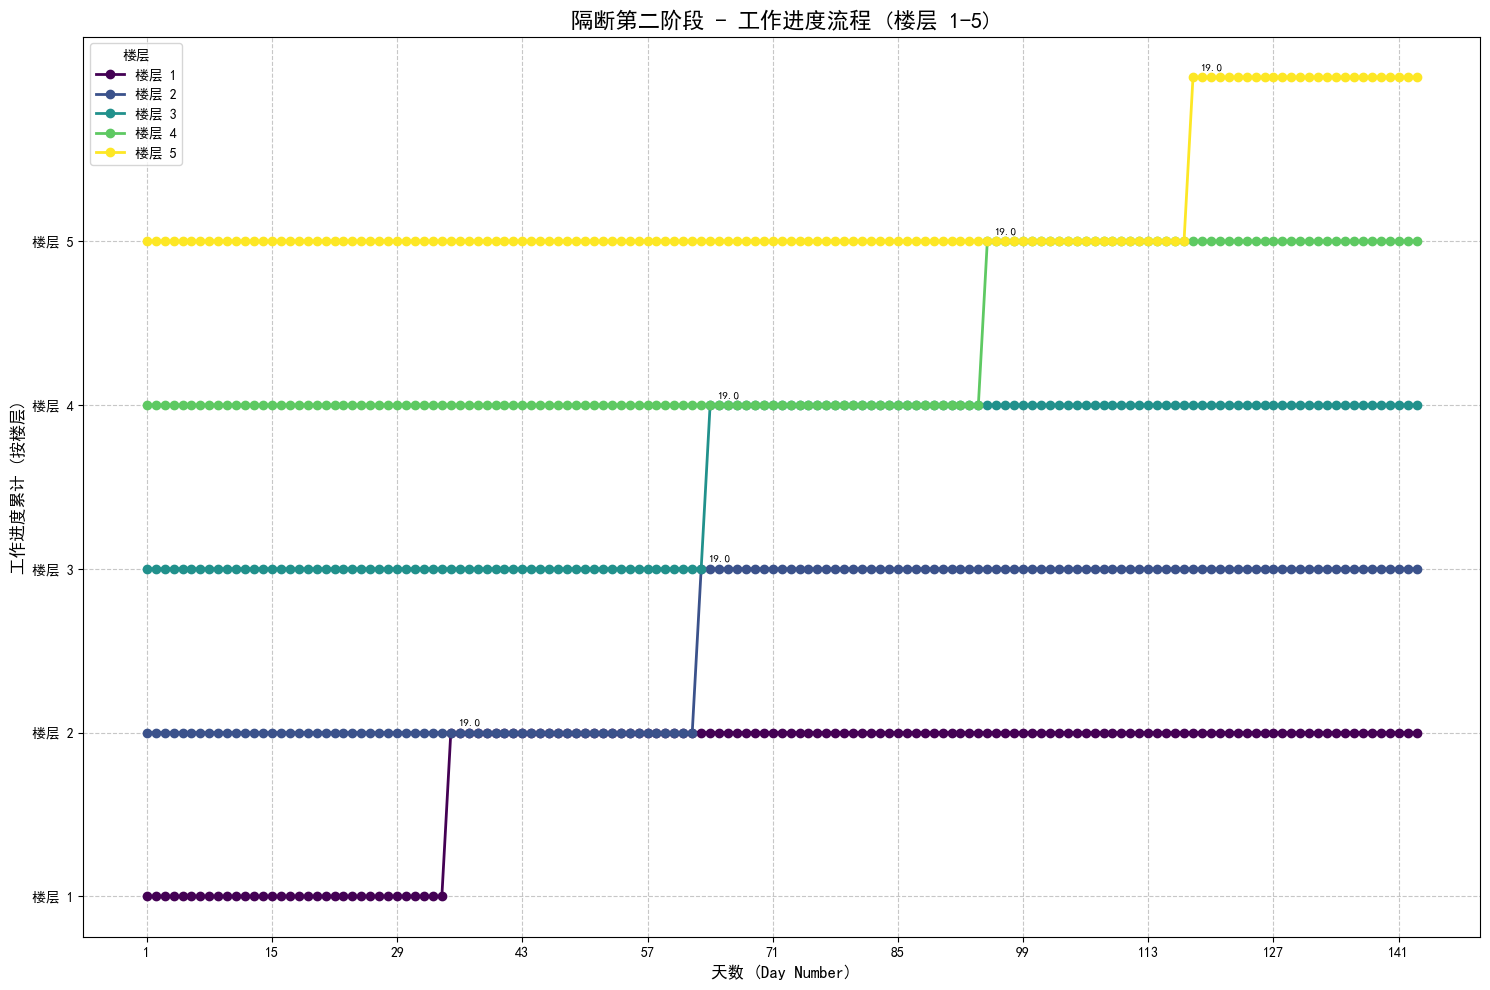

已完成绘制: 隔断第二阶段


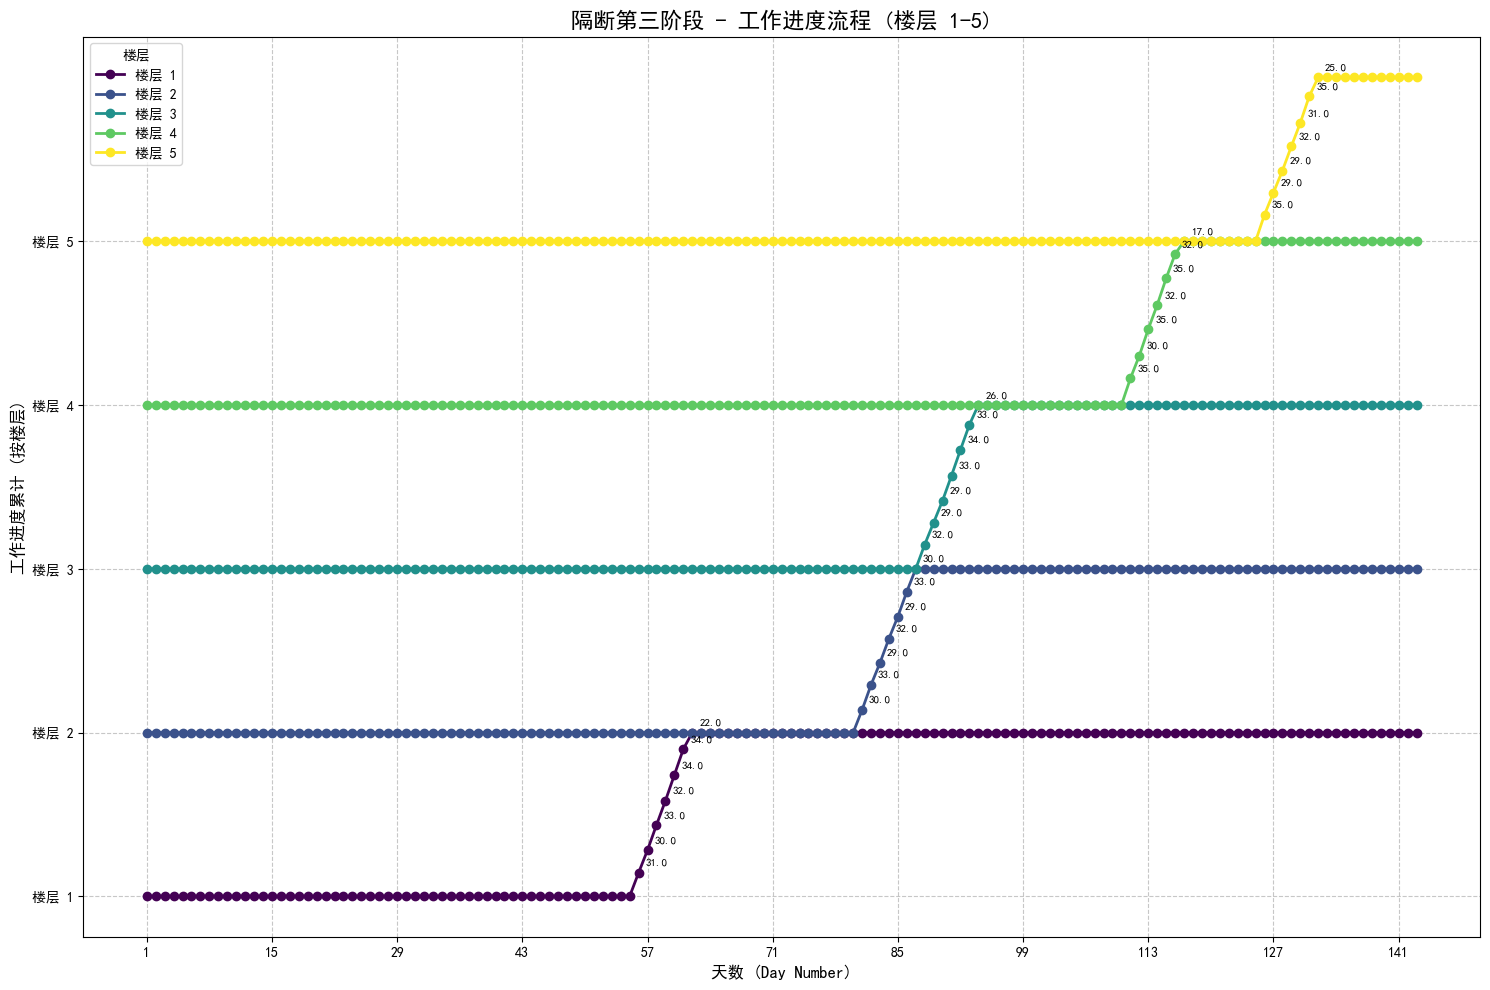

已完成绘制: 隔断第三阶段


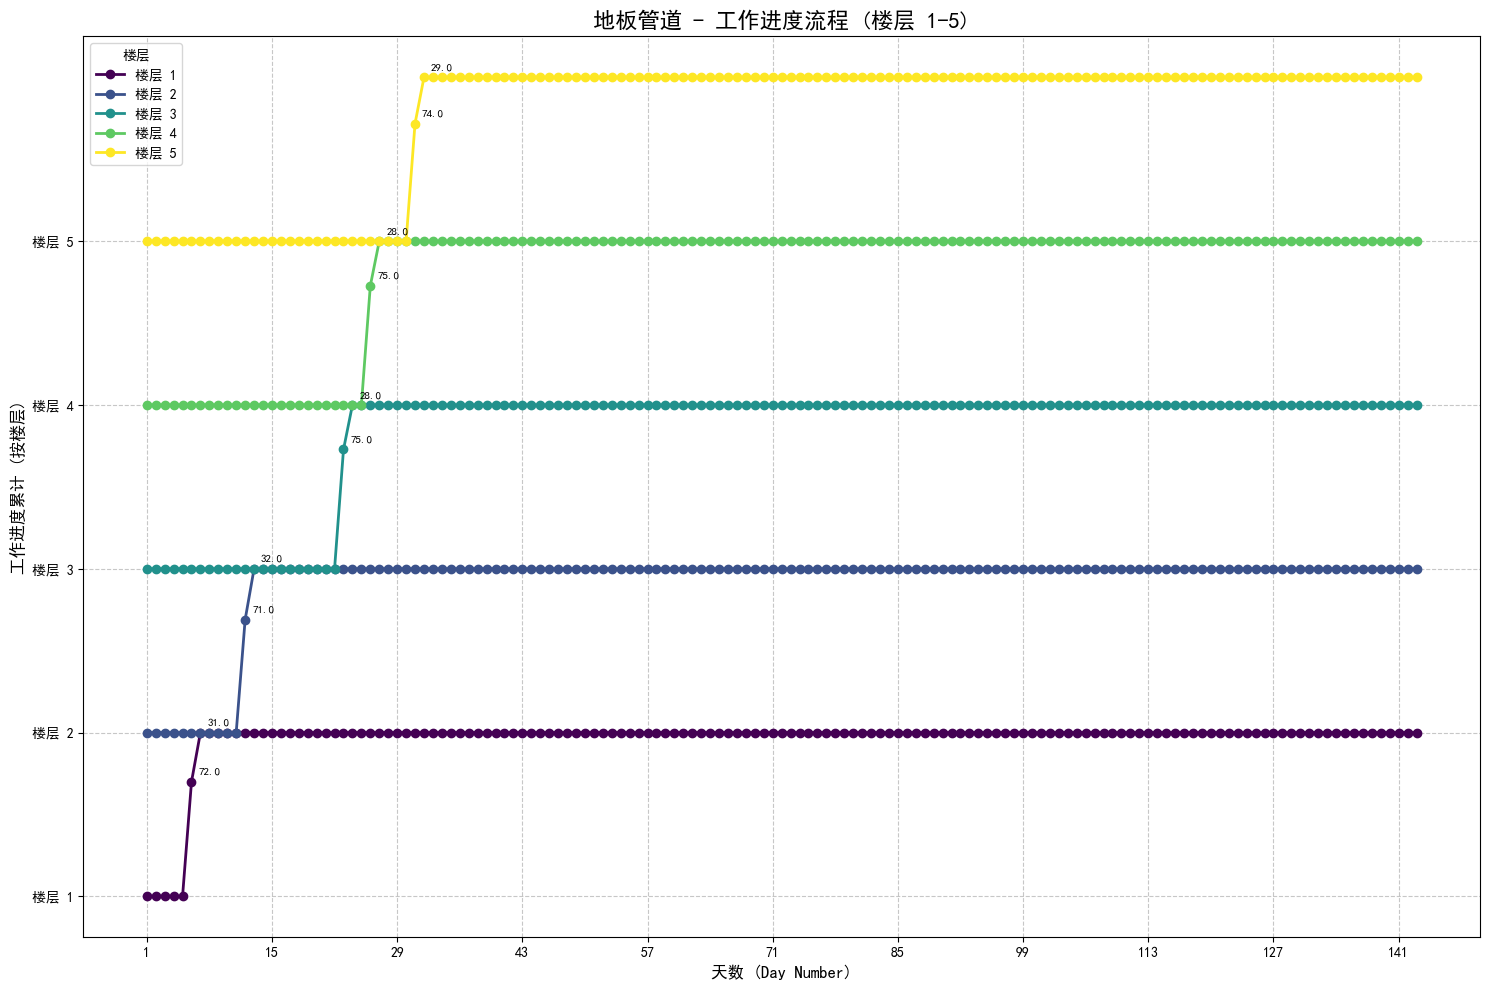

已完成绘制: 地板管道


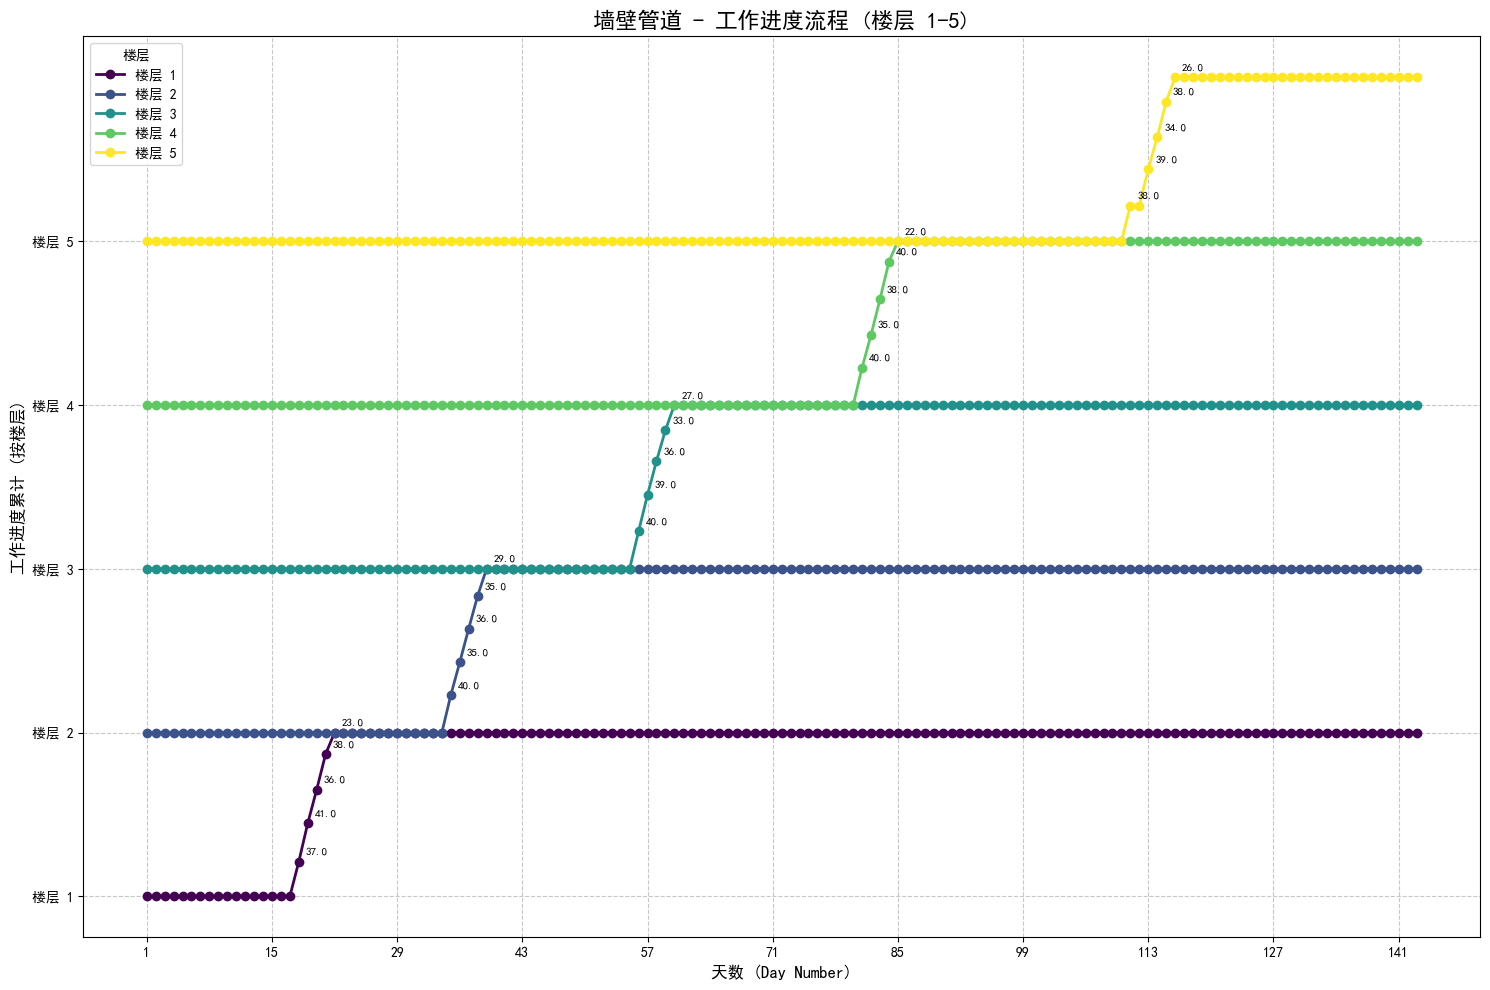

已完成绘制: 墙壁管道


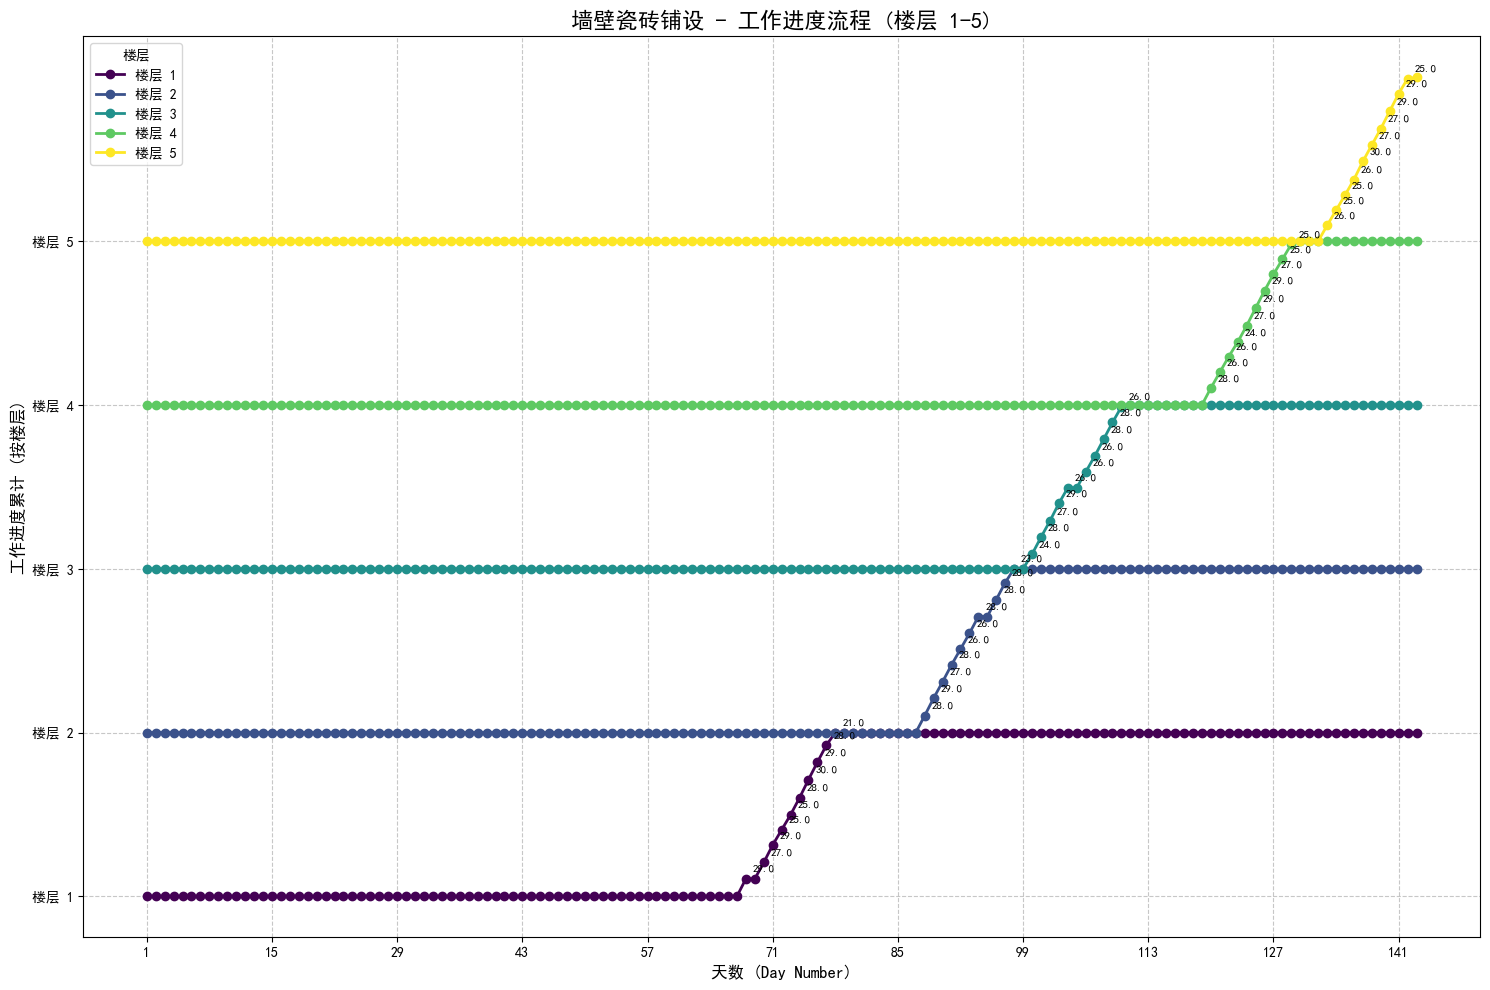

已完成绘制: 墙壁瓷砖铺设


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# --- 工序列表及其中文名称 ---
processes = [
    'Electric conduits in the floor',
    'Electric conduits in the wall',
    'Floor tiling',
    'Gravel base layer',
    'Partition phase 1',
    'Partition phase 2',
    'Partition phase 3',
    'Pipes in the floor',
    'Pipes in the wall',
    'Wall tiling'
]

# 中文对应表
process_names_cn = {
    'Electric conduits in the floor': '地板电线管道',
    'Electric conduits in the wall': '墙壁电线管道',
    'Floor tiling': '地板瓷砖铺设',
    'Gravel base layer': '砂石基层',
    'Partition phase 1': '隔断第一阶段',
    'Partition phase 2': '隔断第二阶段',
    'Partition phase 3': '隔断第三阶段',
    'Pipes in the floor': '地板管道',
    'Pipes in the wall': '墙壁管道',
    'Wall tiling': '墙壁瓷砖铺设'
}

# 为每个工序绘制单独的图表
for process in processes:
    # --- 数据准备 ---
    # 筛选当前工序数据
    process_df = df[df['process'] == process].copy()
    
    # 只保留1-5层的数据
    process_df = process_df[process_df['floor'].isin(range(1, 6))]
    
    if len(process_df) == 0:
        print(f"没有数据用于绘制: {process}")
        continue  # 如果没有数据，跳过此工序
    
    # 计算每日工作量比例 (today_workload / planned_remaining)
    process_df['planned_remaining_safe'] = process_df['planned_remaining'].replace(0, np.nan)
    process_df['workload_ratio'] = process_df['today_workload'] / process_df['planned_remaining_safe']
    
    # 确保 'day_number' 是数值类型并按楼层和天数排序
    process_df['day_number'] = pd.to_numeric(process_df['day_number'], errors='coerce')
    process_df.dropna(subset=['day_number', 'floor', 'workload_ratio'], inplace=True)
    process_df['floor'] = process_df['floor'].astype(int)
    process_df.sort_values(by=['floor', 'day_number'], inplace=True)

    # --- 可视化 ---
    plt.figure(figsize=(15, 10))
    
    # 设置颜色映射
    colors = plt.cm.viridis(np.linspace(0, 1, 5))  # 为5个楼层分配颜色
    
    # 初始化累计高度的字典，记录每层楼的累计工作量
    cumulative_height = {}
    for floor in range(1, 6):
        cumulative_height[floor] = 0
    
    # 绘制每个楼层的工作流线
    for floor in range(1, 6):
        # 获取当前楼层的数据
        floor_data = process_df[process_df['floor'] == floor].copy()
        
        if len(floor_data) > 0:
            # 基础高度设置为 floor-1 (使第1层从0开始，第2层从1开始，依此类推)
            base_height = floor - 1
            
            # 初始化该楼层的工作量线条点
            x_values = []
            y_values = []
            
            # 获取该层的所有天数
            days = sorted(floor_data['day_number'].unique())
            
            # 对每一天进行处理
            for day in days:
                # 获取当天数据
                day_data = floor_data[floor_data['day_number'] == day]
                ratio = day_data['workload_ratio'].iloc[0]
                today_work = day_data['today_workload'].iloc[0]
                
                # 添加点坐标
                x_values.append(day)
                
                # 计算高度：基础高度 + 累计工作量
                cumulative_height[floor] += ratio  # 累加工作量比例
                height = base_height + min(cumulative_height[floor], 1)  # 限制高度不超过下一层
                
                y_values.append(height)
            
            # 绘制工作量线
            plt.plot(x_values, y_values, '-o', 
                     color=colors[floor-1], 
                     linewidth=2, 
                     markersize=6,
                     label=f'楼层 {floor}')
            
            # 在每个点上标注实际工作量(today_workload)
            is_complete = False  # 跟踪是否已完成
            for i, (x, y) in enumerate(zip(x_values, y_values)):
                day_data = floor_data[floor_data['day_number'] == x]
                today_work = day_data['today_workload'].iloc[0]
                
                # 检查是否已经完成（当累计高度接近1时）
                current_progress = y - (floor - 1)
                
                # 只有在任务未完成且工作量不为0时才标注工作量
                if not is_complete and today_work > 0:
                    plt.annotate(f'{today_work:.1f}', 
                                 xy=(x, y),
                                 xytext=(5, 5),
                                 textcoords='offset points',
                                 fontsize=8)
                    
                    # 如果当前进度接近1，标记为已完成
                    if current_progress >= 0.95:  # 假设进度大于95%视为完成
                        is_complete = True
    
    # 添加标题和标签
    plt.title(f'{process_names_cn[process]} - 工作进度流程 (楼层 1-5)', fontsize=16)
    plt.xlabel('天数 (Day Number)', fontsize=12)
    plt.ylabel('工作进度累计 (按楼层)', fontsize=12)
    
    # 设置Y轴刻度，每层楼之间留有空间
    plt.yticks(range(5), ['楼层 1', '楼层 2', '楼层 3', '楼层 4', '楼层 5'])
    
    # 添加图例
    plt.legend(title='楼层', loc='upper left')
    
    # 添加网格线
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 设置X轴只显示关键天数点，避免过于拥挤
    unique_days = sorted(process_df['day_number'].unique())
    if len(unique_days) > 10:
        # 如果天数过多，只显示部分
        step = max(1, len(unique_days) // 10)
        plt.xticks(unique_days[::step])
    else:
        plt.xticks(unique_days)
    
    plt.tight_layout()
    plt.show()
    
    # 打印当前已完成的工序，便于跟踪进度
    print(f"已完成绘制: {process_names_cn[process]}")

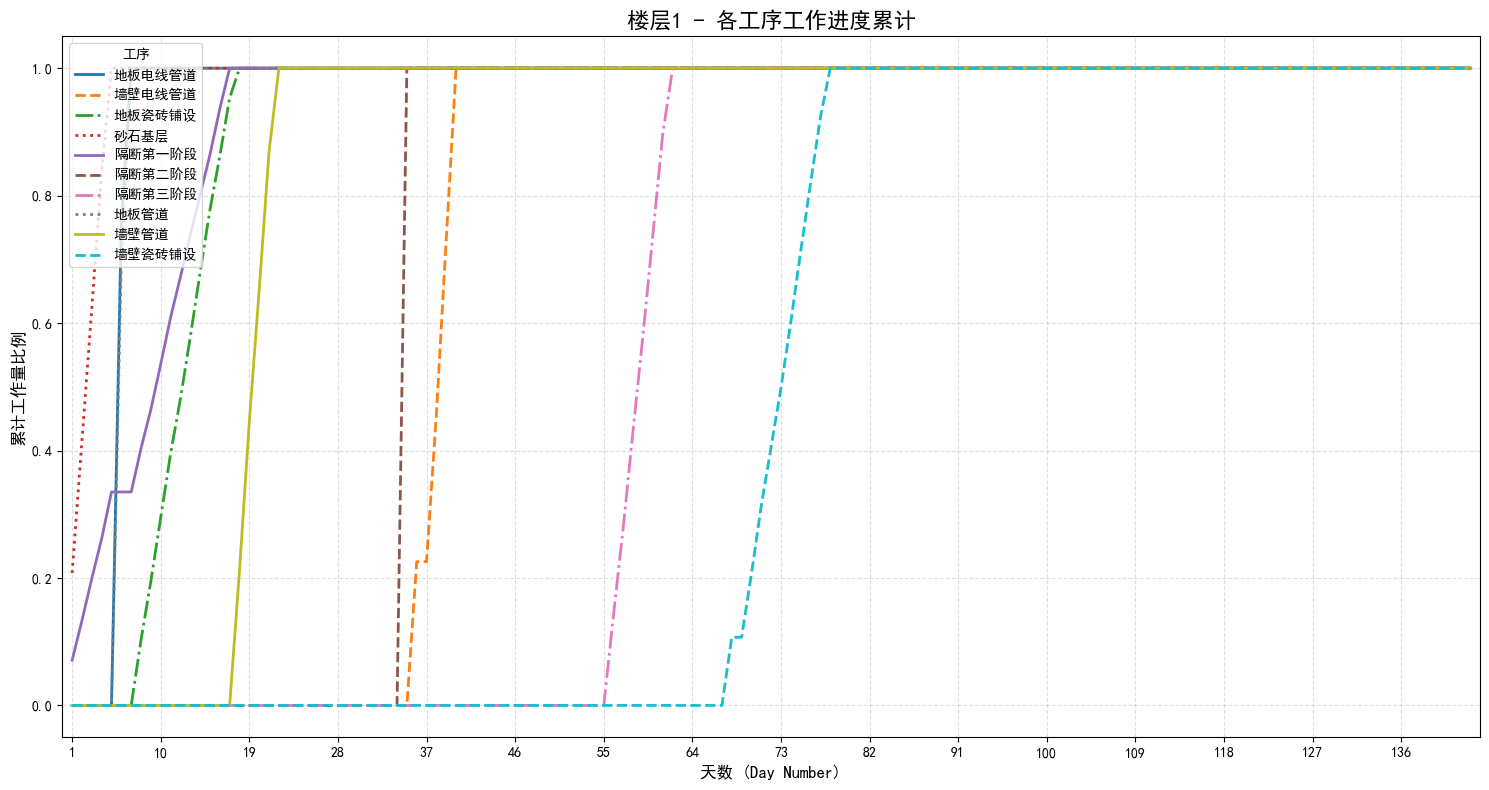

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from cycler import cycler

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# --- 数据准备 ---
# 1. 定义所有需要绘制的工序
processes = [
    'Electric conduits in the floor',
    'Electric conduits in the wall',
    'Floor tiling',
    'Gravel base layer',
    'Partition phase 1',
    'Partition phase 2',
    'Partition phase 3',
    'Pipes in the floor',
    'Pipes in the wall',
    'Wall tiling'
]

# 2. 中文对应表（用于图例和标题显示）
process_names_cn = {
    'Electric conduits in the floor': '地板电线管道',
    'Electric conduits in the wall': '墙壁电线管道',
    'Floor tiling': '地板瓷砖铺设',
    'Gravel base layer': '砂石基层',
    'Partition phase 1': '隔断第一阶段',
    'Partition phase 2': '隔断第二阶段',
    'Partition phase 3': '隔断第三阶段',
    'Pipes in the floor': '地板管道',
    'Pipes in the wall': '墙壁管道',
    'Wall tiling': '墙壁瓷砖铺设'
}

# 创建图表
plt.figure(figsize=(15, 8))

# 使用不同颜色和线型
colors = plt.cm.tab10(np.linspace(0, 1, 10))
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

# 保存所有工序的最大和最小天数
all_days = []

# 处理每个工序
for i, process in enumerate(processes):
    # 筛选当前工序数据
    process_df = df[df['process'] == process].copy()
    
    # 只保留第1层的数据
    process_df = process_df[process_df['floor'] == 1]
    
    if len(process_df) == 0:
        continue  # 如果没有数据，跳过此工序
    
    # 计算每日工作量比例
    process_df['planned_remaining_safe'] = process_df['planned_remaining'].replace(0, np.nan)
    process_df['workload_ratio'] = process_df['today_workload'] / process_df['planned_remaining_safe']
    
    # 确保 day_number 是数值类型并排序
    process_df['day_number'] = pd.to_numeric(process_df['day_number'], errors='coerce')
    process_df.dropna(subset=['day_number', 'workload_ratio'], inplace=True)
    process_df.sort_values(by=['day_number'], inplace=True)
    
    # 收集此工序的所有天数
    days = process_df['day_number'].unique()
    all_days.extend(days)
    
    # 初始化累计工作量和坐标点
    cumulative_work = 0
    x_values = []
    y_values = []
    
    # 获取所有天数
    days = sorted(process_df['day_number'].unique())
    
    # 对每一天进行处理
    for day in days:
        day_data = process_df[process_df['day_number'] == day]
        ratio = day_data['workload_ratio'].iloc[0]
        
        # 添加点坐标
        x_values.append(day)
        
        # 累加工作量比例
        cumulative_work += ratio
        y_values.append(cumulative_work)
    
    # 仅绘制折线，不包括标记点
    plt.plot(x_values, y_values, 
             linestyle=line_styles[i],
             color=colors[i],
             linewidth=2,
             label=process_names_cn[process])

# 添加标题和标签
plt.title('楼层1 - 各工序工作进度累计', fontsize=16)
plt.xlabel('天数 (Day Number)', fontsize=12)
plt.ylabel('累计工作量比例', fontsize=12)

# 添加图例
plt.legend(title='工序', loc='upper left')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.4)

# 设置X轴范围和刻度
if all_days:
    min_day = min(all_days)
    max_day = max(all_days)
    plt.xlim(min_day-1, max_day+1)
    
    # 如果天数太多，只显示部分刻度
    unique_days = sorted(set(all_days))
    if len(unique_days) > 15:
        step = max(1, len(unique_days) // 15)
        plt.xticks(unique_days[::step])
    else:
        plt.xticks(unique_days)

plt.tight_layout()
plt.show()

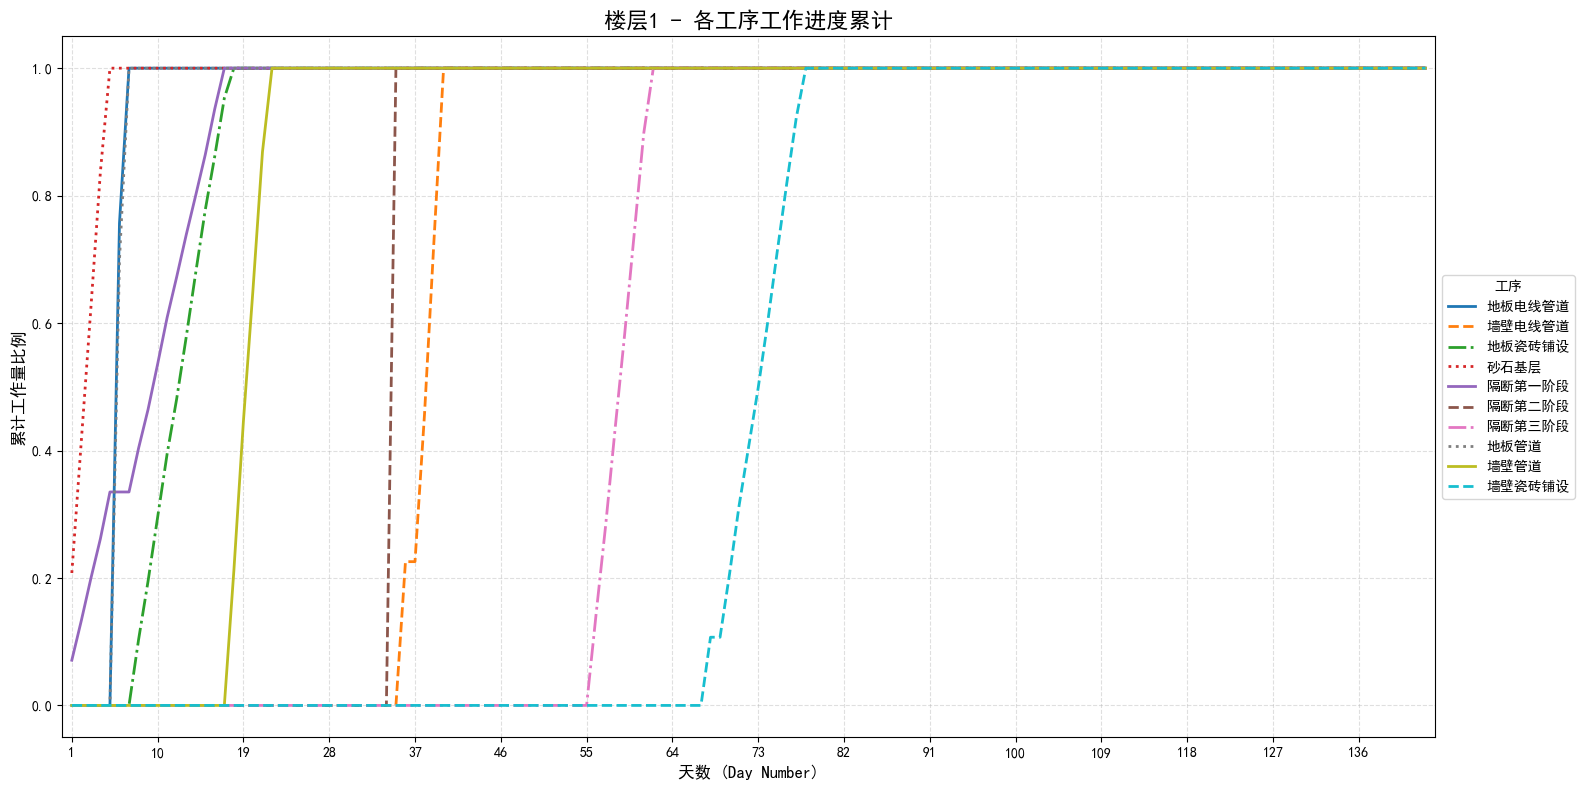

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from cycler import cycler

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# --- 数据准备 ---
# 1. 定义所有需要绘制的工序
processes = [
    'Electric conduits in the floor',
    'Electric conduits in the wall',
    'Floor tiling',
    'Gravel base layer',
    'Partition phase 1',
    'Partition phase 2',
    'Partition phase 3',
    'Pipes in the floor',
    'Pipes in the wall',
    'Wall tiling'
]

# 2. 中文对应表（用于图例和标题显示）
process_names_cn = {
    'Electric conduits in the floor': '地板电线管道',
    'Electric conduits in the wall': '墙壁电线管道',
    'Floor tiling': '地板瓷砖铺设',
    'Gravel base layer': '砂石基层',
    'Partition phase 1': '隔断第一阶段',
    'Partition phase 2': '隔断第二阶段',
    'Partition phase 3': '隔断第三阶段',
    'Pipes in the floor': '地板管道',
    'Pipes in the wall': '墙壁管道',
    'Wall tiling': '墙壁瓷砖铺设'
}

# 创建图表 - 增大宽度以适应右侧图例
plt.figure(figsize=(18, 8))

# 使用不同颜色和线型
colors = plt.cm.tab10(np.linspace(0, 1, 10))
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

# 保存所有工序的最大和最小天数
all_days = []

# 处理每个工序
for i, process in enumerate(processes):
    # 筛选当前工序数据
    process_df = df[df['process'] == process].copy()
    
    # 只保留第1层的数据
    process_df = process_df[process_df['floor'] == 1]
    
    if len(process_df) == 0:
        continue  # 如果没有数据，跳过此工序
    
    # 计算每日工作量比例
    process_df['planned_remaining_safe'] = process_df['planned_remaining'].replace(0, np.nan)
    process_df['workload_ratio'] = process_df['today_workload'] / process_df['planned_remaining_safe']
    
    # 确保 day_number 是数值类型并排序
    process_df['day_number'] = pd.to_numeric(process_df['day_number'], errors='coerce')
    process_df.dropna(subset=['day_number', 'workload_ratio'], inplace=True)
    process_df.sort_values(by=['day_number'], inplace=True)
    
    # 收集此工序的所有天数
    days = process_df['day_number'].unique()
    all_days.extend(days)
    
    # 初始化累计工作量和坐标点
    cumulative_work = 0
    x_values = []
    y_values = []
    
    # 获取所有天数
    days = sorted(process_df['day_number'].unique())
    
    # 对每一天进行处理
    for day in days:
        day_data = process_df[process_df['day_number'] == day]
        ratio = day_data['workload_ratio'].iloc[0]
        
        # 添加点坐标
        x_values.append(day)
        
        # 累加工作量比例
        cumulative_work += ratio
        y_values.append(cumulative_work)
    
    # 仅绘制折线，不包括标记点
    plt.plot(x_values, y_values, 
             linestyle=line_styles[i],
             color=colors[i],
             linewidth=2,
             label=process_names_cn[process])

# 添加标题和标签
plt.title('楼层1 - 各工序工作进度累计', fontsize=16)
plt.xlabel('天数 (Day Number)', fontsize=12)
plt.ylabel('累计工作量比例', fontsize=12)

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.4)

# 设置X轴范围和刻度
if all_days:
    min_day = min(all_days)
    max_day = max(all_days)
    plt.xlim(min_day-1, max_day+1)
    
    # 如果天数太多，只显示部分刻度
    unique_days = sorted(set(all_days))
    if len(unique_days) > 15:
        step = max(1, len(unique_days) // 15)
        plt.xticks(unique_days[::step])
    else:
        plt.xticks(unique_days)

# 添加图例，并放在图外面右侧
plt.legend(title='工序', loc='center left', bbox_to_anchor=(1.0, 0.5))

# 调整布局以适应图例
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # 为图例预留右侧空间

plt.show()

我来为您创建一个图表组合，先依次展示5层楼的各工序工作进度折线图，然后将它们组合成一张综合图。以下是代码：



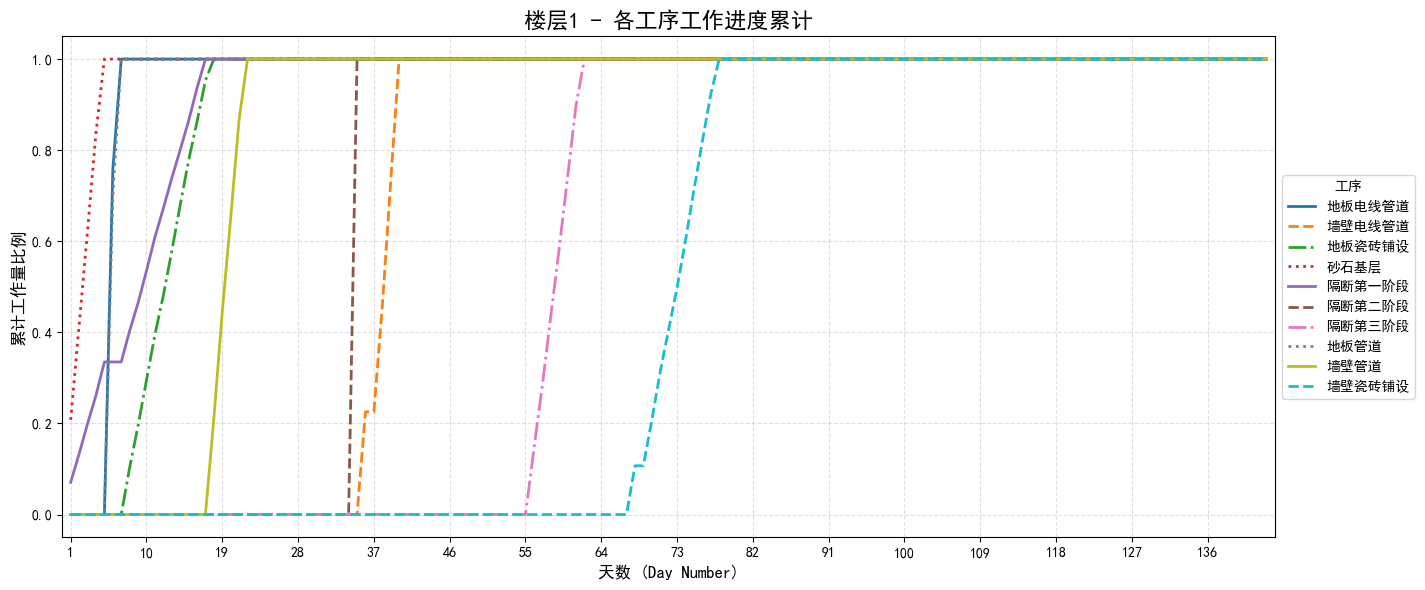

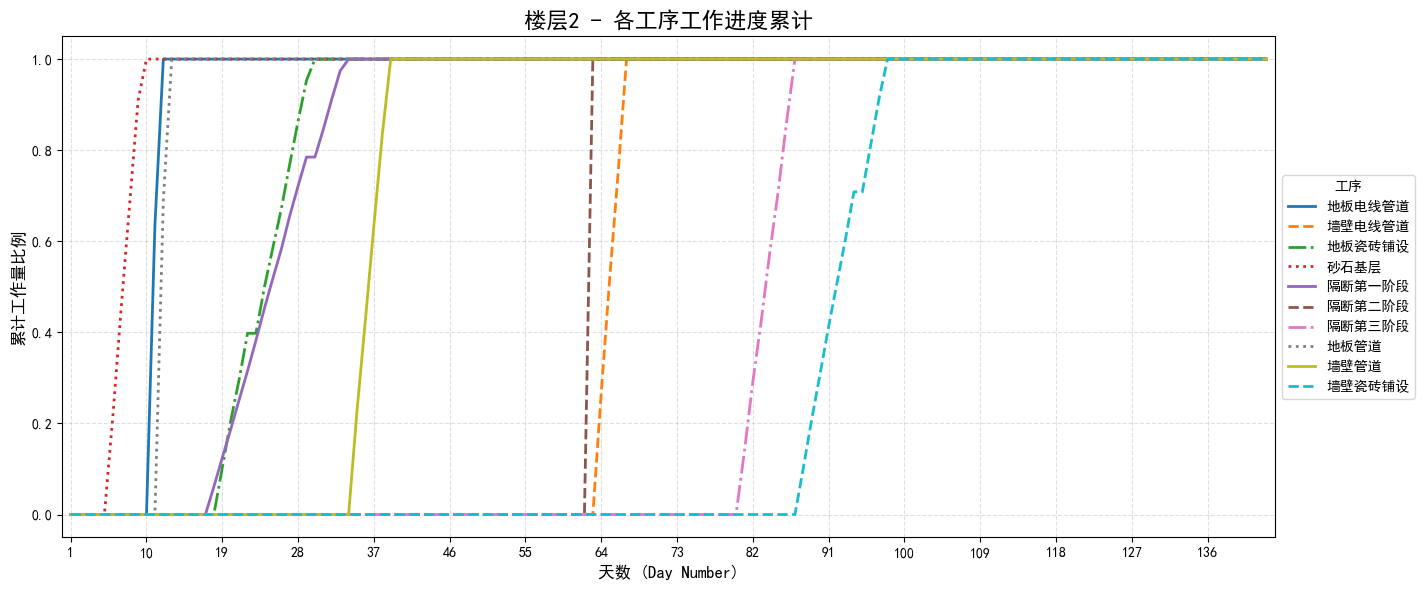

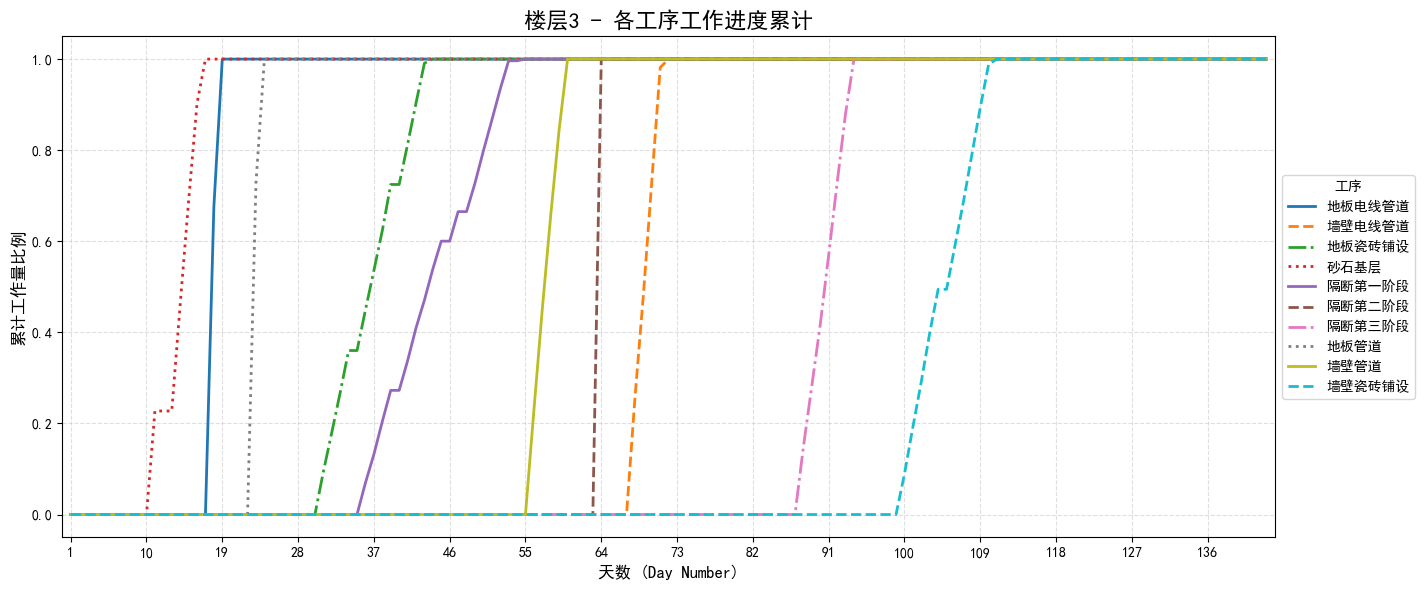

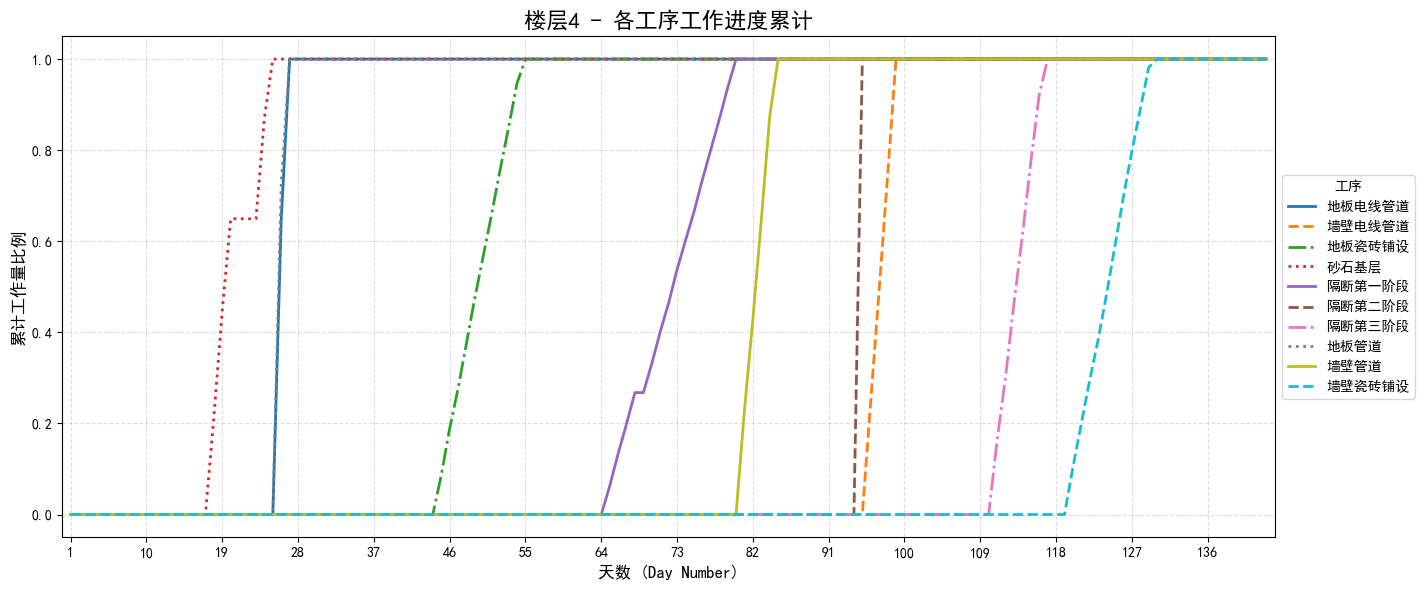

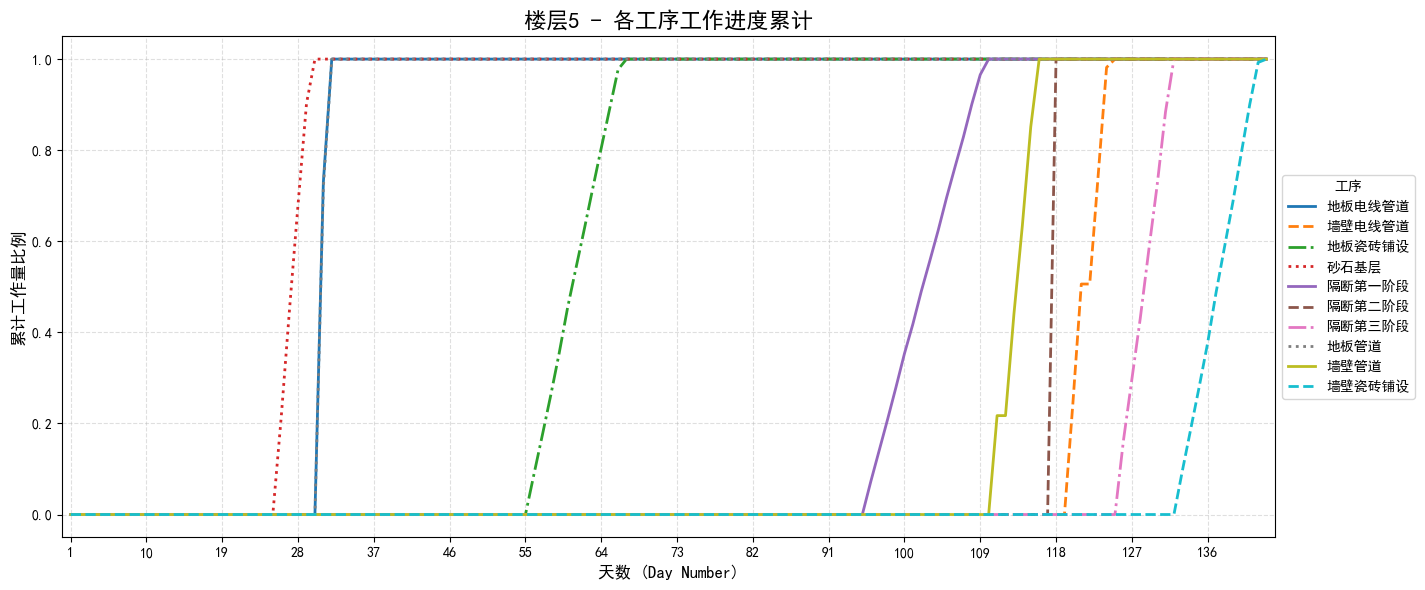

C:\Users\asus\AppData\Local\Temp\ipykernel_35360\3613184059.py:215: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


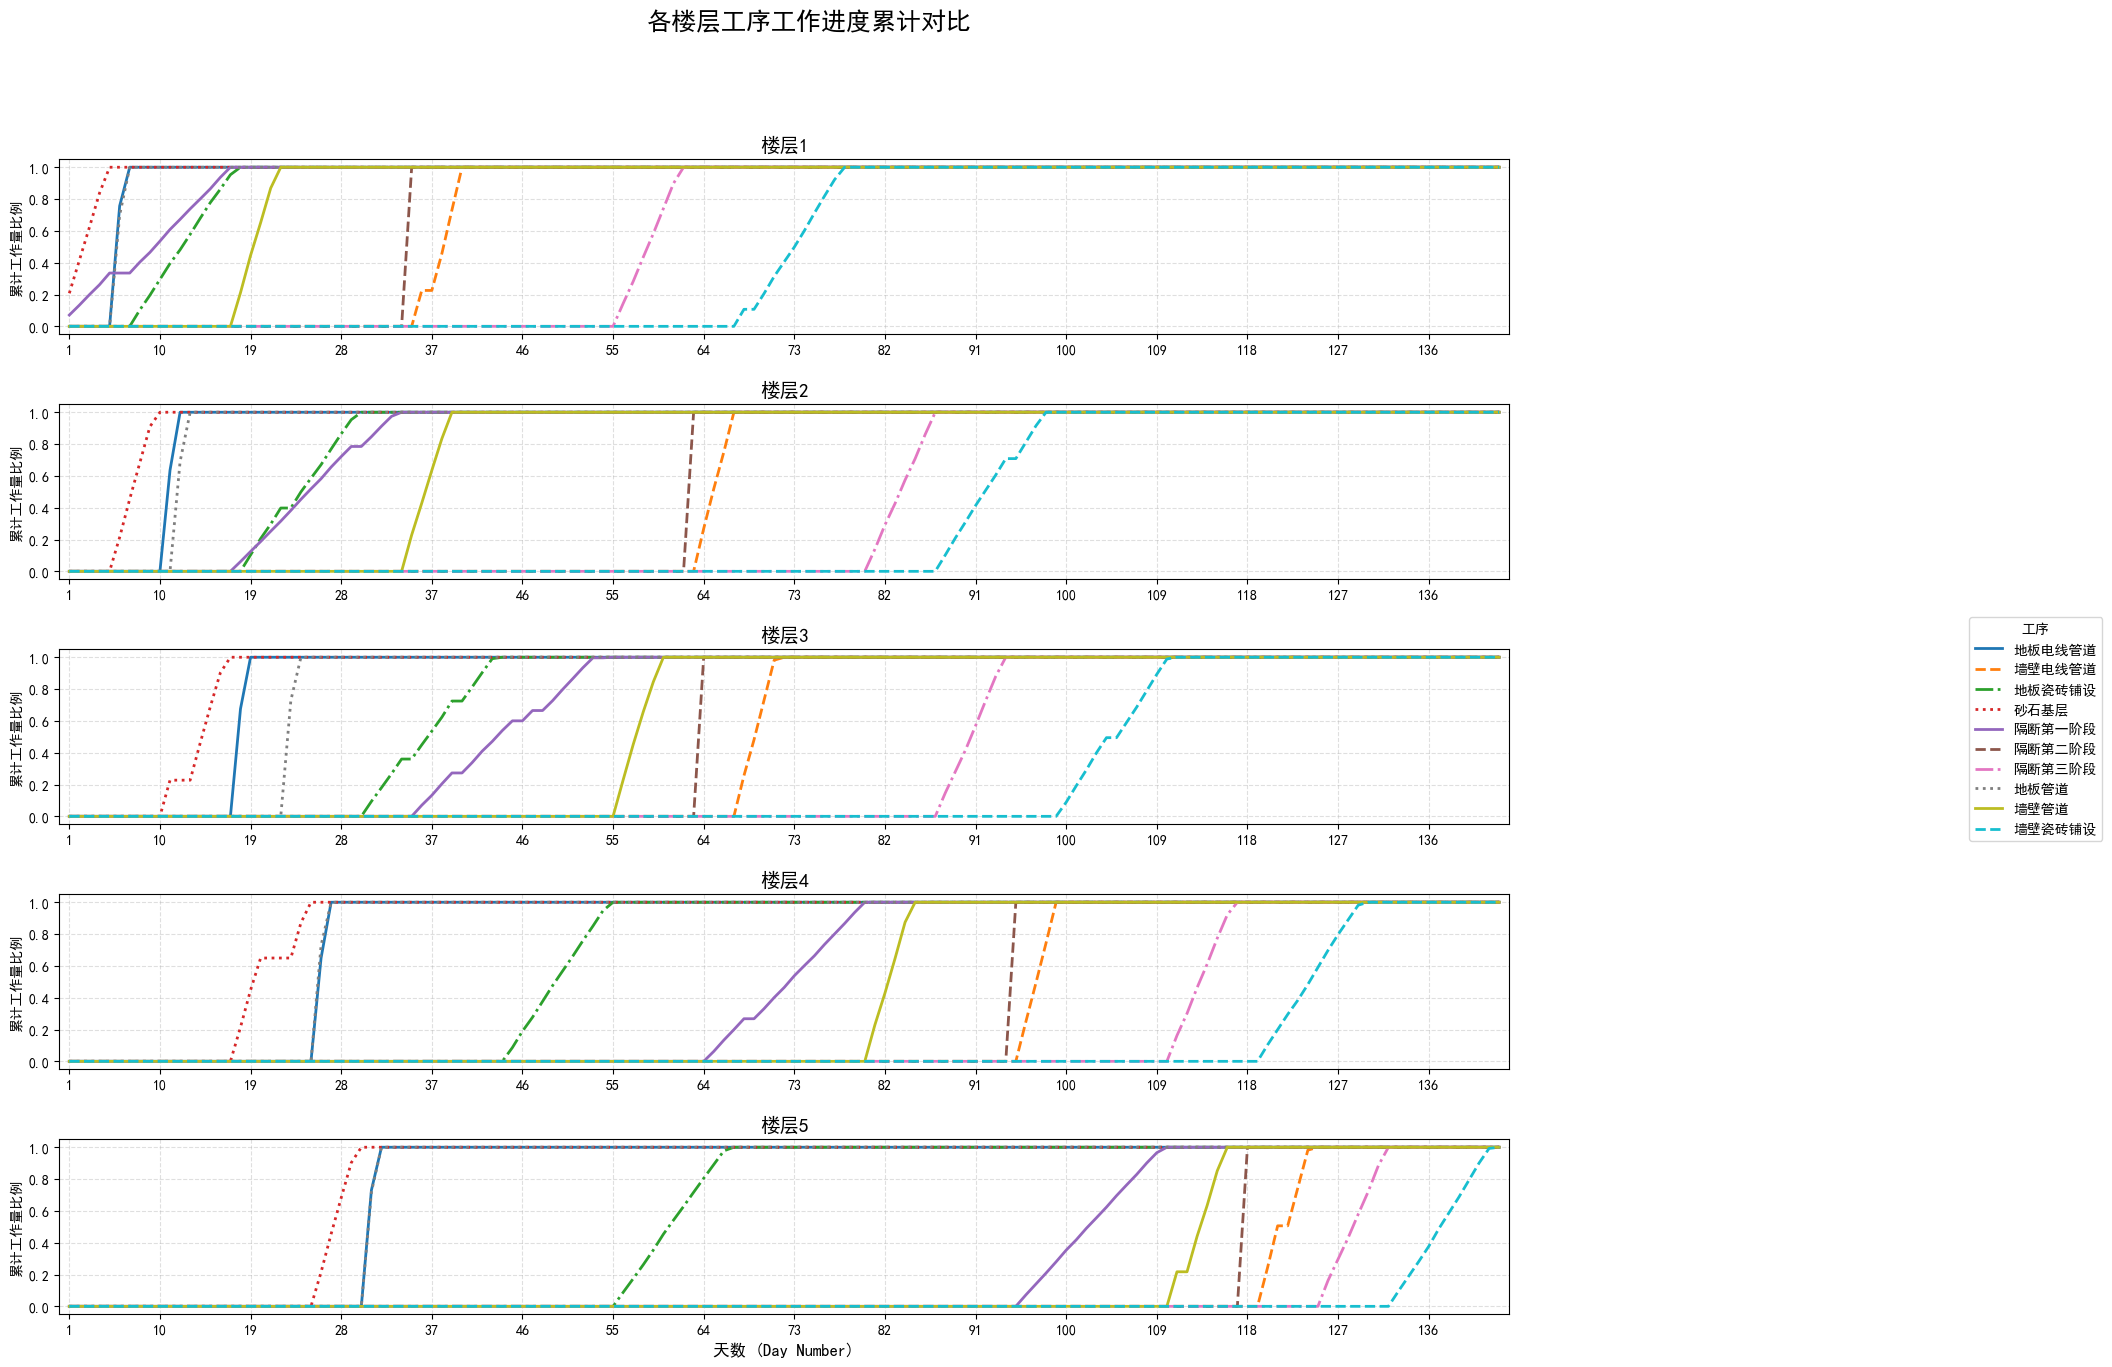

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from cycler import cycler
from matplotlib.gridspec import GridSpec

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# --- 数据准备 ---
# 1. 定义所有需要绘制的工序
processes = [
    'Electric conduits in the floor',
    'Electric conduits in the wall',
    'Floor tiling',
    'Gravel base layer',
    'Partition phase 1',
    'Partition phase 2',
    'Partition phase 3',
    'Pipes in the floor',
    'Pipes in the wall',
    'Wall tiling'
]

# 2. 中文对应表（用于图例和标题显示）
process_names_cn = {
    'Electric conduits in the floor': '地板电线管道',
    'Electric conduits in the wall': '墙壁电线管道',
    'Floor tiling': '地板瓷砖铺设',
    'Gravel base layer': '砂石基层',
    'Partition phase 1': '隔断第一阶段',
    'Partition phase 2': '隔断第二阶段',
    'Partition phase 3': '隔断第三阶段',
    'Pipes in the floor': '地板管道',
    'Pipes in the wall': '墙壁管道',
    'Wall tiling': '墙壁瓷砖铺设'
}

# 为每层楼创建单独的图表
# 保存每层楼的图表数据，以便后续组合
floor_plots_data = {}

# 使用不同颜色和线型
colors = plt.cm.tab10(np.linspace(0, 1, 10))
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

# 所有楼层共享的最大和最小天数
all_days = []

# 首先为每层楼创建单独的图表
for floor_num in range(1, 6):
    # 创建当前楼层的图
    plt.figure(figsize=(16, 6))
    
    # 保存当前楼层的所有工序数据
    floor_data = {}
    
    # 处理每个工序
    for i, process in enumerate(processes):
        # 筛选当前工序数据
        process_df = df[df['process'] == process].copy()
        
        # 只保留当前层的数据
        process_df = process_df[process_df['floor'] == floor_num]
        
        if len(process_df) == 0:
            continue  # 如果没有数据，跳过此工序
        
        # 计算每日工作量比例
        process_df['planned_remaining_safe'] = process_df['planned_remaining'].replace(0, np.nan)
        process_df['workload_ratio'] = process_df['today_workload'] / process_df['planned_remaining_safe']
        
        # 确保 day_number 是数值类型并排序
        process_df['day_number'] = pd.to_numeric(process_df['day_number'], errors='coerce')
        process_df.dropna(subset=['day_number', 'workload_ratio'], inplace=True)
        process_df.sort_values(by=['day_number'], inplace=True)
        
        # 收集此工序的所有天数
        days = process_df['day_number'].unique()
        all_days.extend(days)
        
        # 初始化累计工作量和坐标点
        cumulative_work = 0
        x_values = []
        y_values = []
        
        # 获取所有天数
        days = sorted(process_df['day_number'].unique())
        
        # 对每一天进行处理
        for day in days:
            day_data = process_df[process_df['day_number'] == day]
            ratio = day_data['workload_ratio'].iloc[0]
            
            # 添加点坐标
            x_values.append(day)
            
            # 累加工作量比例
            cumulative_work += ratio
            y_values.append(cumulative_work)
        
        # 仅绘制折线，不包括标记点
        plt.plot(x_values, y_values, 
                 linestyle=line_styles[i],
                 color=colors[i],
                 linewidth=2,
                 label=process_names_cn[process])
        
        # 保存数据用于组合图
        floor_data[process] = {'x': x_values, 'y': y_values, 'color': colors[i], 'style': line_styles[i]}
    
    # 添加标题和标签
    plt.title(f'楼层{floor_num} - 各工序工作进度累计', fontsize=16)
    plt.xlabel('天数 (Day Number)', fontsize=12)
    plt.ylabel('累计工作量比例', fontsize=12)
    
    # 添加网格线
    plt.grid(True, linestyle='--', alpha=0.4)
    
    # 设置X轴范围和刻度
    if all_days:
        min_day = min(all_days)
        max_day = max(all_days)
        plt.xlim(min_day-1, max_day+1)
        
        # 如果天数太多，只显示部分刻度
        unique_days = sorted(set(all_days))
        if len(unique_days) > 15:
            step = max(1, len(unique_days) // 15)
            plt.xticks(unique_days[::step])
        else:
            plt.xticks(unique_days)
    
    # 添加图例，放在图外面右侧
    plt.legend(title='工序', loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    # 调整布局以适应图例
    plt.tight_layout()
    plt.subplots_adjust(right=0.8)  # 为图例预留右侧空间
    
    # 保存当前图表
    plt.show()
    
    # 保存此楼层的数据
    floor_plots_data[floor_num] = floor_data

# 现在创建一个组合图表，显示所有5层楼的数据
plt.figure(figsize=(20, 15))
gs = GridSpec(5, 1, height_ratios=[1, 1, 1, 1, 1], hspace=0.4)

# 创建共享的图例数据
legend_handles = []
legend_labels = []
used_processes = set()

# 为每层创建一个子图
for i, floor_num in enumerate(range(1, 6)):
    ax = plt.subplot(gs[i])
    
    # 处理每个工序
    for j, process in enumerate(processes):
        if process in floor_plots_data[floor_num]:
            data = floor_plots_data[floor_num][process]
            
            # 绘制折线
            line, = ax.plot(data['x'], data['y'], 
                       linestyle=data['style'],
                       color=data['color'],
                       linewidth=2)
            
            # 只为第一次出现的工序添加到图例
            if process not in used_processes:
                legend_handles.append(line)
                legend_labels.append(process_names_cn[process])
                used_processes.add(process)
    
    # 添加标题、标签和网格
    ax.set_title(f'楼层{floor_num}', fontsize=14)
    ax.set_ylabel('累计工作量比例', fontsize=10)
    
    # 只给最底部的子图添加x轴标签
    if i == 4:  # 最后一个子图
        ax.set_xlabel('天数 (Day Number)', fontsize=12)
    
    # 添加网格线
    ax.grid(True, linestyle='--', alpha=0.4)
    
    # 设置X轴范围和刻度
    if all_days:
        min_day = min(all_days)
        max_day = max(all_days)
        ax.set_xlim(min_day-1, max_day+1)
        
        # 如果天数太多，只显示部分刻度
        unique_days = sorted(set(all_days))
        if len(unique_days) > 15:
            step = max(1, len(unique_days) // 15)
            ax.set_xticks(unique_days[::step])
        else:
            ax.set_xticks(unique_days)

# 添加总标题
plt.suptitle('各楼层工序工作进度累计对比', fontsize=18)

# 添加一个图例，显示所有工序，放在图的右侧
plt.figlegend(legend_handles, legend_labels, 
              loc='center right', 
              title='工序',
              bbox_to_anchor=(1.15, 0.5))

# 调整布局
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # 为图例预留右侧空间

# 显示组合图表
plt.show()



这段代码的功能：

1. 首先，它会依次为第1-5层楼创建单独的折线图，每个图展示该层所有工序的工作进度累计情况
   - 每张图都有自己的图例（放在右侧）
   - 使用不同颜色和线型区分不同工序
   - 仅绘制折线，不显示数据点标记

2. 然后，创建一个大型组合图，将所有5层楼的图表垂直排列
   - 5个子图共享同一个X轴刻度设置
   - 只有底部子图（第5层楼）显示X轴标签
   - 所有工序的图例统一放在整个图表的右侧
   - 组合图的顶部有一个总标题

这样可以方便地比较不同楼层之间各工序的进展情况，同时又能单独查看每层楼的详细信息。图例放在右侧避免了遮挡图表内容的问题。

我来修改代码，创建一个合并图表，将楼层标记在左侧，去除图间间隔，共用一个横坐标，并按楼层划分纵轴：



<Figure size 2000x1200 with 0 Axes>

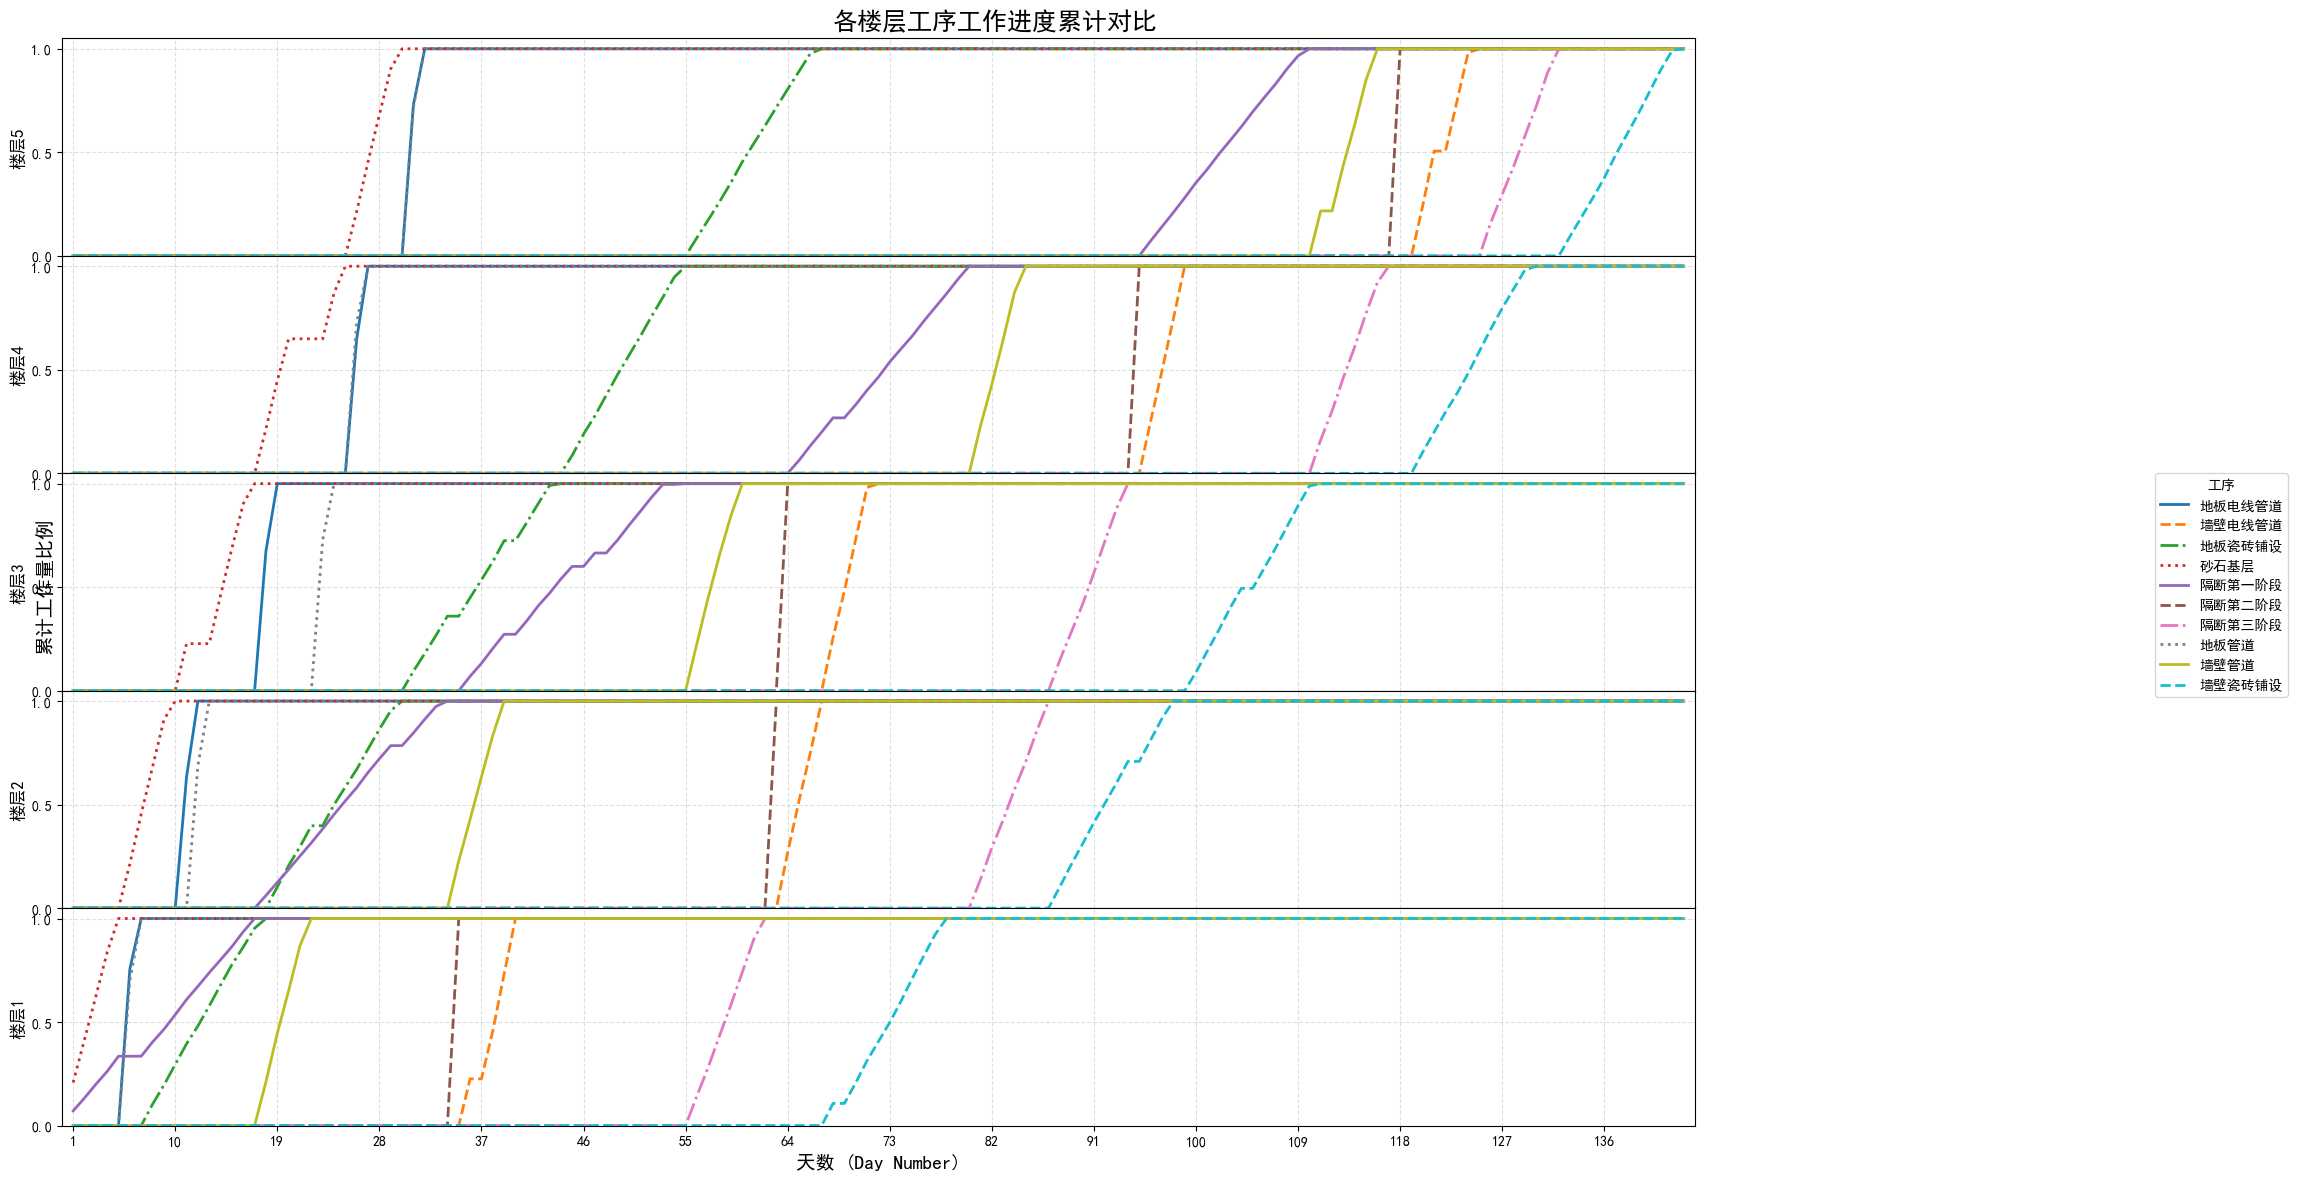

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from cycler import cycler
from matplotlib.gridspec import GridSpec

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# --- 数据准备 ---
# 1. 定义所有需要绘制的工序
processes = [
    'Electric conduits in the floor',
    'Electric conduits in the wall',
    'Floor tiling',
    'Gravel base layer',
    'Partition phase 1',
    'Partition phase 2',
    'Partition phase 3',
    'Pipes in the floor',
    'Pipes in the wall',
    'Wall tiling'
]

# 2. 中文对应表（用于图例和标题显示）
process_names_cn = {
    'Electric conduits in the floor': '地板电线管道',
    'Electric conduits in the wall': '墙壁电线管道',
    'Floor tiling': '地板瓷砖铺设',
    'Gravel base layer': '砂石基层',
    'Partition phase 1': '隔断第一阶段',
    'Partition phase 2': '隔断第二阶段',
    'Partition phase 3': '隔断第三阶段',
    'Pipes in the floor': '地板管道',
    'Pipes in the wall': '墙壁管道',
    'Wall tiling': '墙壁瓷砖铺设'
}

# 为每层楼收集数据，以便后续组合
floor_plots_data = {}

# 使用不同颜色和线型
colors = plt.cm.tab10(np.linspace(0, 1, 10))
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

# 所有楼层共享的最大和最小天数
all_days = []

# 首先为每层楼收集数据（不单独显示每层图表）
for floor_num in range(1, 6):
    # 保存当前楼层的所有工序数据
    floor_data = {}
    
    # 处理每个工序
    for i, process in enumerate(processes):
        # 筛选当前工序数据
        process_df = df[df['process'] == process].copy()
        
        # 只保留当前层的数据
        process_df = process_df[process_df['floor'] == floor_num]
        
        if len(process_df) == 0:
            continue  # 如果没有数据，跳过此工序
        
        # 计算每日工作量比例
        process_df['planned_remaining_safe'] = process_df['planned_remaining'].replace(0, np.nan)
        process_df['workload_ratio'] = process_df['today_workload'] / process_df['planned_remaining_safe']
        
        # 确保 day_number 是数值类型并排序
        process_df['day_number'] = pd.to_numeric(process_df['day_number'], errors='coerce')
        process_df.dropna(subset=['day_number', 'workload_ratio'], inplace=True)
        process_df.sort_values(by=['day_number'], inplace=True)
        
        # 收集此工序的所有天数
        days = process_df['day_number'].unique()
        all_days.extend(days)
        
        # 初始化累计工作量和坐标点
        cumulative_work = 0
        x_values = []
        y_values = []
        
        # 获取所有天数
        days = sorted(process_df['day_number'].unique())
        
        # 对每一天进行处理
        for day in days:
            day_data = process_df[process_df['day_number'] == day]
            ratio = day_data['workload_ratio'].iloc[0]
            
            # 添加点坐标
            x_values.append(day)
            
            # 累加工作量比例
            cumulative_work += ratio
            y_values.append(cumulative_work)
        
        # 保存数据用于组合图
        floor_data[process] = {'x': x_values, 'y': y_values, 'color': colors[i], 'style': line_styles[i]}
    
    # 保存此楼层的数据
    floor_plots_data[floor_num] = floor_data

# 创建组合图表，显示所有5层楼的数据
plt.figure(figsize=(20, 12))

# 创建一个共享x轴的子图布局
fig, axs = plt.subplots(5, 1, figsize=(20, 12), sharex=True)

# 调整子图之间的间距为0
plt.subplots_adjust(hspace=0)

# 创建共享的图例数据
legend_handles = []
legend_labels = []
used_processes = set()

# 为每层创建一个子图
for i, floor_num in enumerate(range(5, 0, -1)):  # 从5楼到1楼倒序排列
    ax = axs[i]
    
    # 处理每个工序
    for j, process in enumerate(processes):
        if process in floor_plots_data[floor_num]:
            data = floor_plots_data[floor_num][process]
            
            # 绘制折线
            line, = ax.plot(data['x'], data['y'], 
                      linestyle=data['style'],
                      color=data['color'],
                      linewidth=2)
            
            # 只为第一次出现的工序添加到图例
            if process not in used_processes:
                legend_handles.append(line)
                legend_labels.append(process_names_cn[process])
                used_processes.add(process)
    
    # 设置y轴标签为楼层号
    ax.set_ylabel(f'楼层{floor_num}', fontsize=12)
    
    # 添加网格线
    ax.grid(True, linestyle='--', alpha=0.4)
    
    # 设置Y轴范围为0-1
    ax.set_ylim(0, 1.05)
    
    # 设置Y轴刻度位置
    ax.set_yticks([0, 0.5, 1.0])
    
    # 如果不是底部子图，则隐藏x轴刻度标签
    if i < 4:
        plt.setp(ax.get_xticklabels(), visible=False)

# 设置X轴标签（只在最底部子图上添加）
axs[4].set_xlabel('天数 (Day Number)', fontsize=14)

# 设置X轴范围和刻度
if all_days:
    min_day = min(all_days)
    max_day = max(all_days)
    plt.xlim(min_day-1, max_day+1)
    
    # 如果天数太多，只显示部分刻度
    unique_days = sorted(set(all_days))
    if len(unique_days) > 15:
        step = max(1, len(unique_days) // 15)
        plt.xticks(unique_days[::step])
    else:
        plt.xticks(unique_days)

# 添加总标题
fig.suptitle('各楼层工序工作进度累计对比', fontsize=18)

# 添加一个图例，显示所有工序，放在图的右侧
fig.legend(legend_handles, legend_labels, 
          loc='center right', 
          title='工序',
          bbox_to_anchor=(1.15, 0.5))

# 添加y轴的总标签
fig.text(0.02, 0.5, '累计工作量比例', va='center', rotation='vertical', fontsize=14)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0)  # 为图例留出空间，并消除子图之间的间隔

# 显示组合图表
plt.show()



这个修改后的代码有以下特点：

1. **纵向排列楼层**：从上到下依次为5楼到1楼，直观地展示楼层顺序
2. **共用横坐标**：使用`sharex=True`参数，所有子图共享x轴，只在底部显示一个x轴标签
3. **无间隔**：使用`plt.subplots_adjust(hspace=0)`消除子图之间的间隔
4. **楼层标记在左侧**：每个子图左侧的y轴标签显示"楼层X"
5. **图例统一放在右侧**：所有工序的图例统一放在整张图的右侧
6. **统一的y轴范围**：所有子图的y轴范围设为0-1.05，便于比较各楼层的进度
7. **纵轴总标签**：在图表最左侧添加一个"累计工作量比例"的总标签

这样的布局清晰展示了各楼层各工序的进度情况，便于横向和纵向的比较，同时图例放在右侧避免了遮挡图表内容的问题。

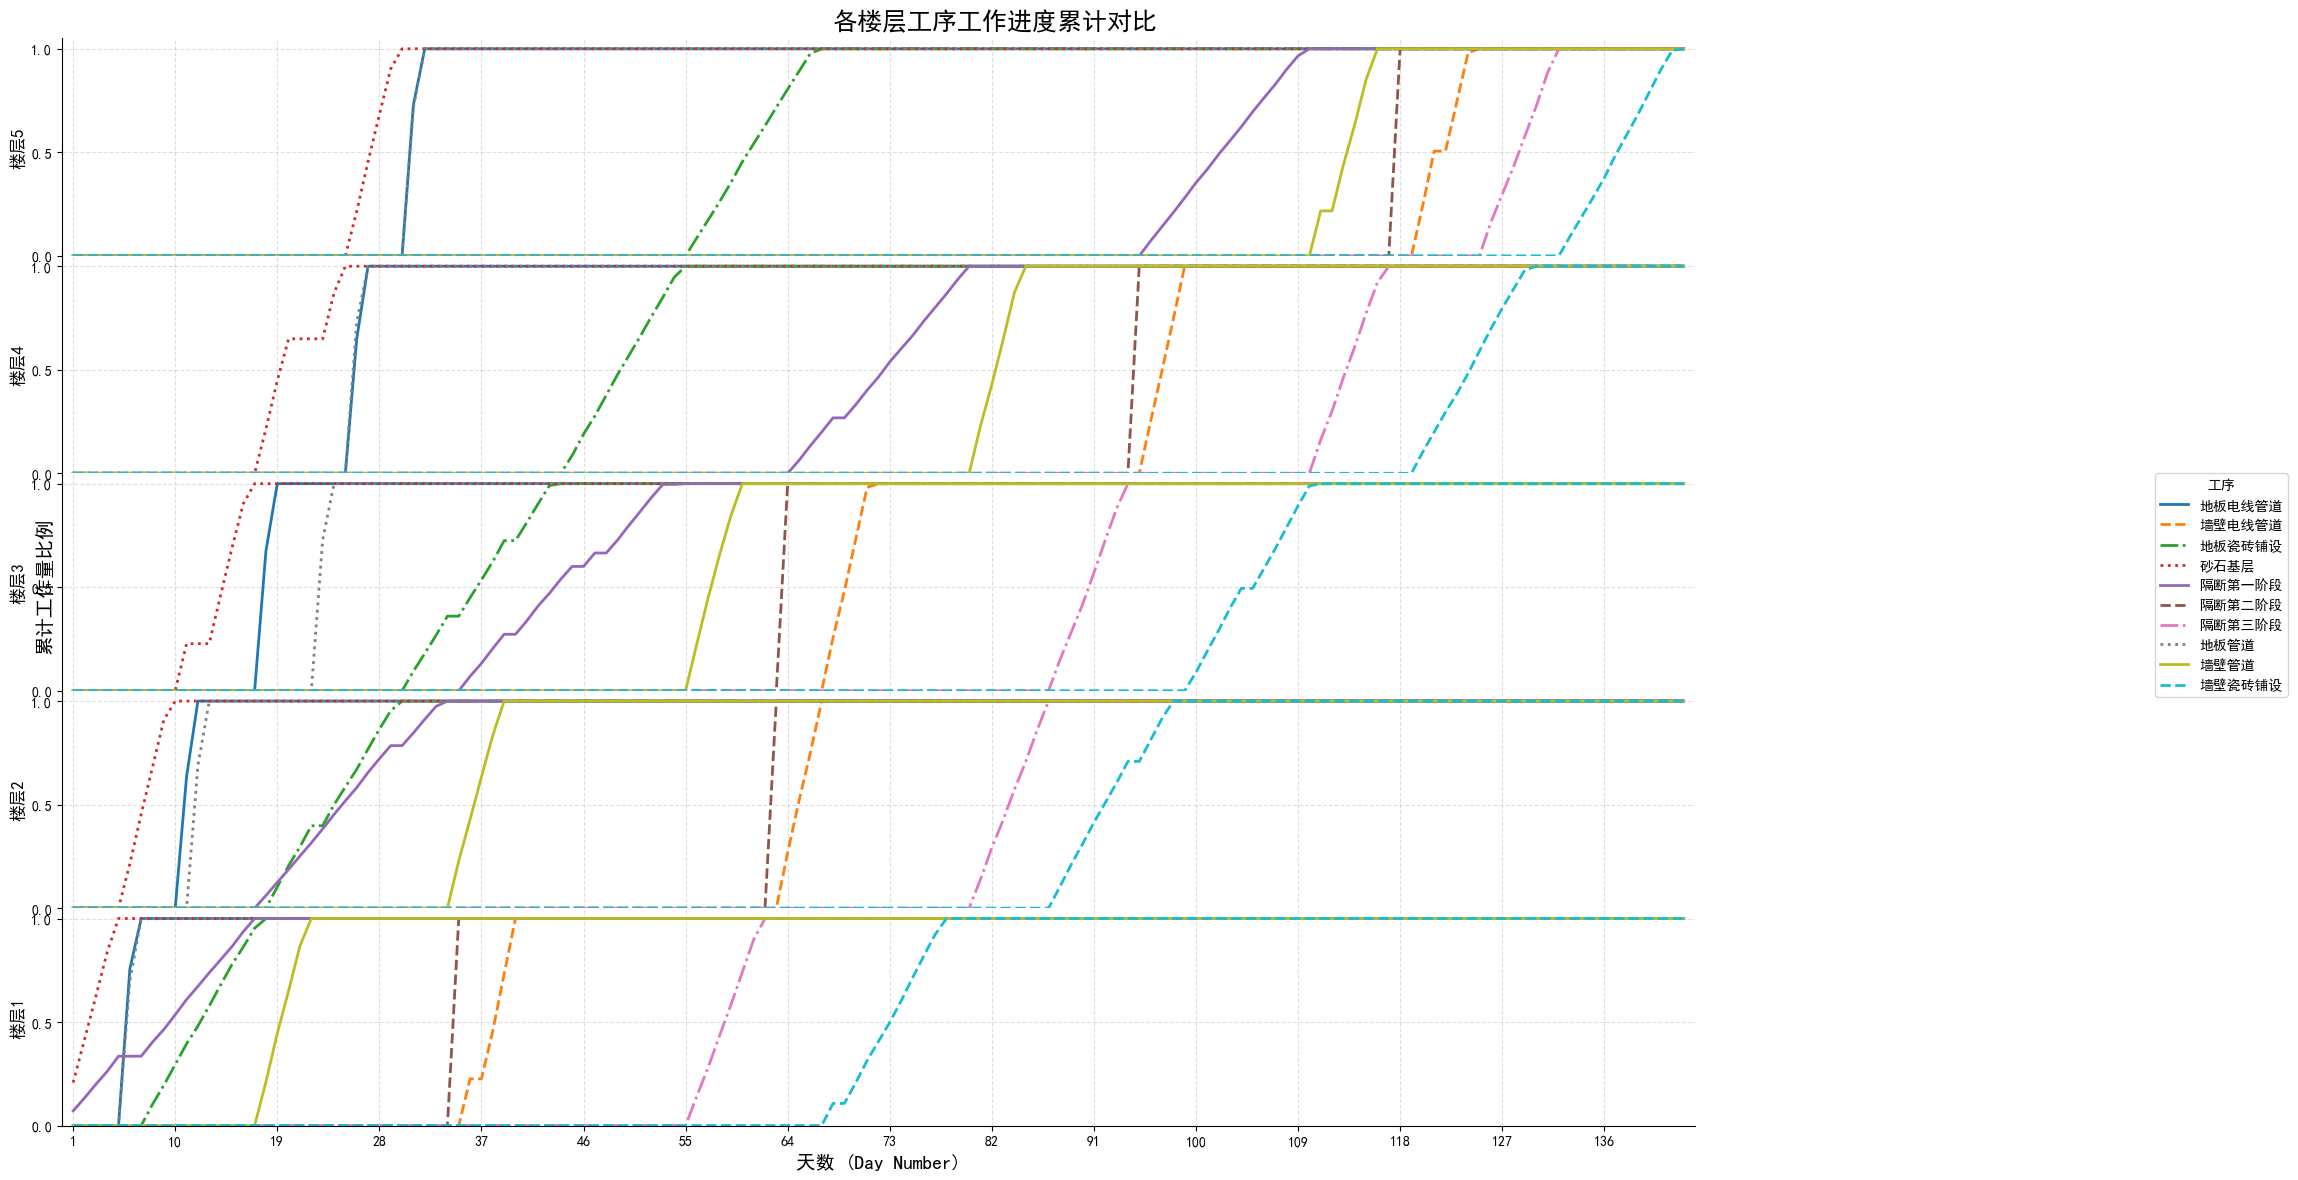

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from cycler import cycler
from matplotlib.gridspec import GridSpec

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# --- 数据准备 ---
# 1. 定义所有需要绘制的工序
processes = [
    'Electric conduits in the floor',
    'Electric conduits in the wall',
    'Floor tiling',
    'Gravel base layer',
    'Partition phase 1',
    'Partition phase 2',
    'Partition phase 3',
    'Pipes in the floor',
    'Pipes in the wall',
    'Wall tiling'
]

# 2. 中文对应表（用于图例和标题显示）
process_names_cn = {
    'Electric conduits in the floor': '地板电线管道',
    'Electric conduits in the wall': '墙壁电线管道',
    'Floor tiling': '地板瓷砖铺设',
    'Gravel base layer': '砂石基层',
    'Partition phase 1': '隔断第一阶段',
    'Partition phase 2': '隔断第二阶段',
    'Partition phase 3': '隔断第三阶段',
    'Pipes in the floor': '地板管道',
    'Pipes in the wall': '墙壁管道',
    'Wall tiling': '墙壁瓷砖铺设'
}

# 为每层楼收集数据，以便后续组合
floor_plots_data = {}

# 使用不同颜色和线型
colors = plt.cm.tab10(np.linspace(0, 1, 10))
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

# 所有楼层共享的最大和最小天数
all_days = []

# 首先为每层楼收集数据（不单独显示每层图表）
for floor_num in range(1, 6):
    # 保存当前楼层的所有工序数据
    floor_data = {}
    
    # 处理每个工序
    for i, process in enumerate(processes):
        # 筛选当前工序数据
        process_df = df[df['process'] == process].copy()
        
        # 只保留当前层的数据
        process_df = process_df[process_df['floor'] == floor_num]
        
        if len(process_df) == 0:
            continue  # 如果没有数据，跳过此工序
        
        # 计算每日工作量比例
        process_df['planned_remaining_safe'] = process_df['planned_remaining'].replace(0, np.nan)
        process_df['workload_ratio'] = process_df['today_workload'] / process_df['planned_remaining_safe']
        
        # 确保 day_number 是数值类型并排序
        process_df['day_number'] = pd.to_numeric(process_df['day_number'], errors='coerce')
        process_df.dropna(subset=['day_number', 'workload_ratio'], inplace=True)
        process_df.sort_values(by=['day_number'], inplace=True)
        
        # 收集此工序的所有天数
        days = process_df['day_number'].unique()
        all_days.extend(days)
        
        # 初始化累计工作量和坐标点
        cumulative_work = 0
        x_values = []
        y_values = []
        
        # 获取所有天数
        days = sorted(process_df['day_number'].unique())
        
        # 对每一天进行处理
        for day in days:
            day_data = process_df[process_df['day_number'] == day]
            ratio = day_data['workload_ratio'].iloc[0]
            
            # 添加点坐标
            x_values.append(day)
            
            # 累加工作量比例
            cumulative_work += ratio
            y_values.append(cumulative_work)
        
        # 保存数据用于组合图
        floor_data[process] = {'x': x_values, 'y': y_values, 'color': colors[i], 'style': line_styles[i]}
    
    # 保存此楼层的数据
    floor_plots_data[floor_num] = floor_data

# 创建一个共享x轴的子图布局
fig, axs = plt.subplots(5, 1, figsize=(20, 12), sharex=True)

# 创建共享的图例数据
legend_handles = []
legend_labels = []
used_processes = set()

# 为每层创建一个子图
for i, floor_num in enumerate(range(5, 0, -1)):  # 从5楼到1楼倒序排列
    ax = axs[i]
    
    # 处理每个工序
    for j, process in enumerate(processes):
        if process in floor_plots_data[floor_num]:
            data = floor_plots_data[floor_num][process]
            
            # 绘制折线
            line, = ax.plot(data['x'], data['y'], 
                      linestyle=data['style'],
                      color=data['color'],
                      linewidth=2)
            
            # 只为第一次出现的工序添加到图例
            if process not in used_processes:
                legend_handles.append(line)
                legend_labels.append(process_names_cn[process])
                used_processes.add(process)
    
    # 设置y轴标签为楼层号
    ax.set_ylabel(f'楼层{floor_num}', fontsize=12)
    
    # 添加网格线
    ax.grid(True, linestyle='--', alpha=0.4)
    
    # 设置Y轴范围为0-1
    ax.set_ylim(0, 1.05)
    
    # 设置Y轴刻度位置
    ax.set_yticks([0, 0.5, 1.0])
    
    # 移除四周的边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 如果不是底部子图，则隐藏x轴刻度标签和底部边框
    if i < 4:
        plt.setp(ax.get_xticklabels(), visible=False)
        ax.spines['bottom'].set_visible(False)
        # 移除底部刻度
        ax.tick_params(axis='x', which='both', bottom=False)
    else:
        # 只保留底部子图的底部边框
        ax.spines['bottom'].set_visible(True)

# 设置X轴标签（只在最底部子图上添加）
axs[4].set_xlabel('天数 (Day Number)', fontsize=14)

# 设置X轴范围和刻度
if all_days:
    min_day = min(all_days)
    max_day = max(all_days)
    plt.xlim(min_day-1, max_day+1)
    
    # 如果天数太多，只显示部分刻度
    unique_days = sorted(set(all_days))
    if len(unique_days) > 15:
        step = max(1, len(unique_days) // 15)
        plt.xticks(unique_days[::step])
    else:
        plt.xticks(unique_days)

# 添加总标题
fig.suptitle('各楼层工序工作进度累计对比', fontsize=18)

# 添加一个图例，显示所有工序，放在图的右侧
fig.legend(legend_handles, legend_labels, 
          loc='center right', 
          title='工序',
          bbox_to_anchor=(1.15, 0.5))

# 添加y轴的总标签
fig.text(0.02, 0.5, '累计工作量比例', va='center', rotation='vertical', fontsize=14)

# 调整子图之间的间距为0，完全消除子图之间的空白
plt.subplots_adjust(hspace=0)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0)  # 为图例留出空间，并消除子图之间的间隔

# 显示组合图表
plt.show()

根据您的要求，我已对代码进行了修改：去除纵轴总标签，确保层间无断层直接连接，从第0天开始绘图，以及隐藏已完成工作的后续标记。以下是完整代码：



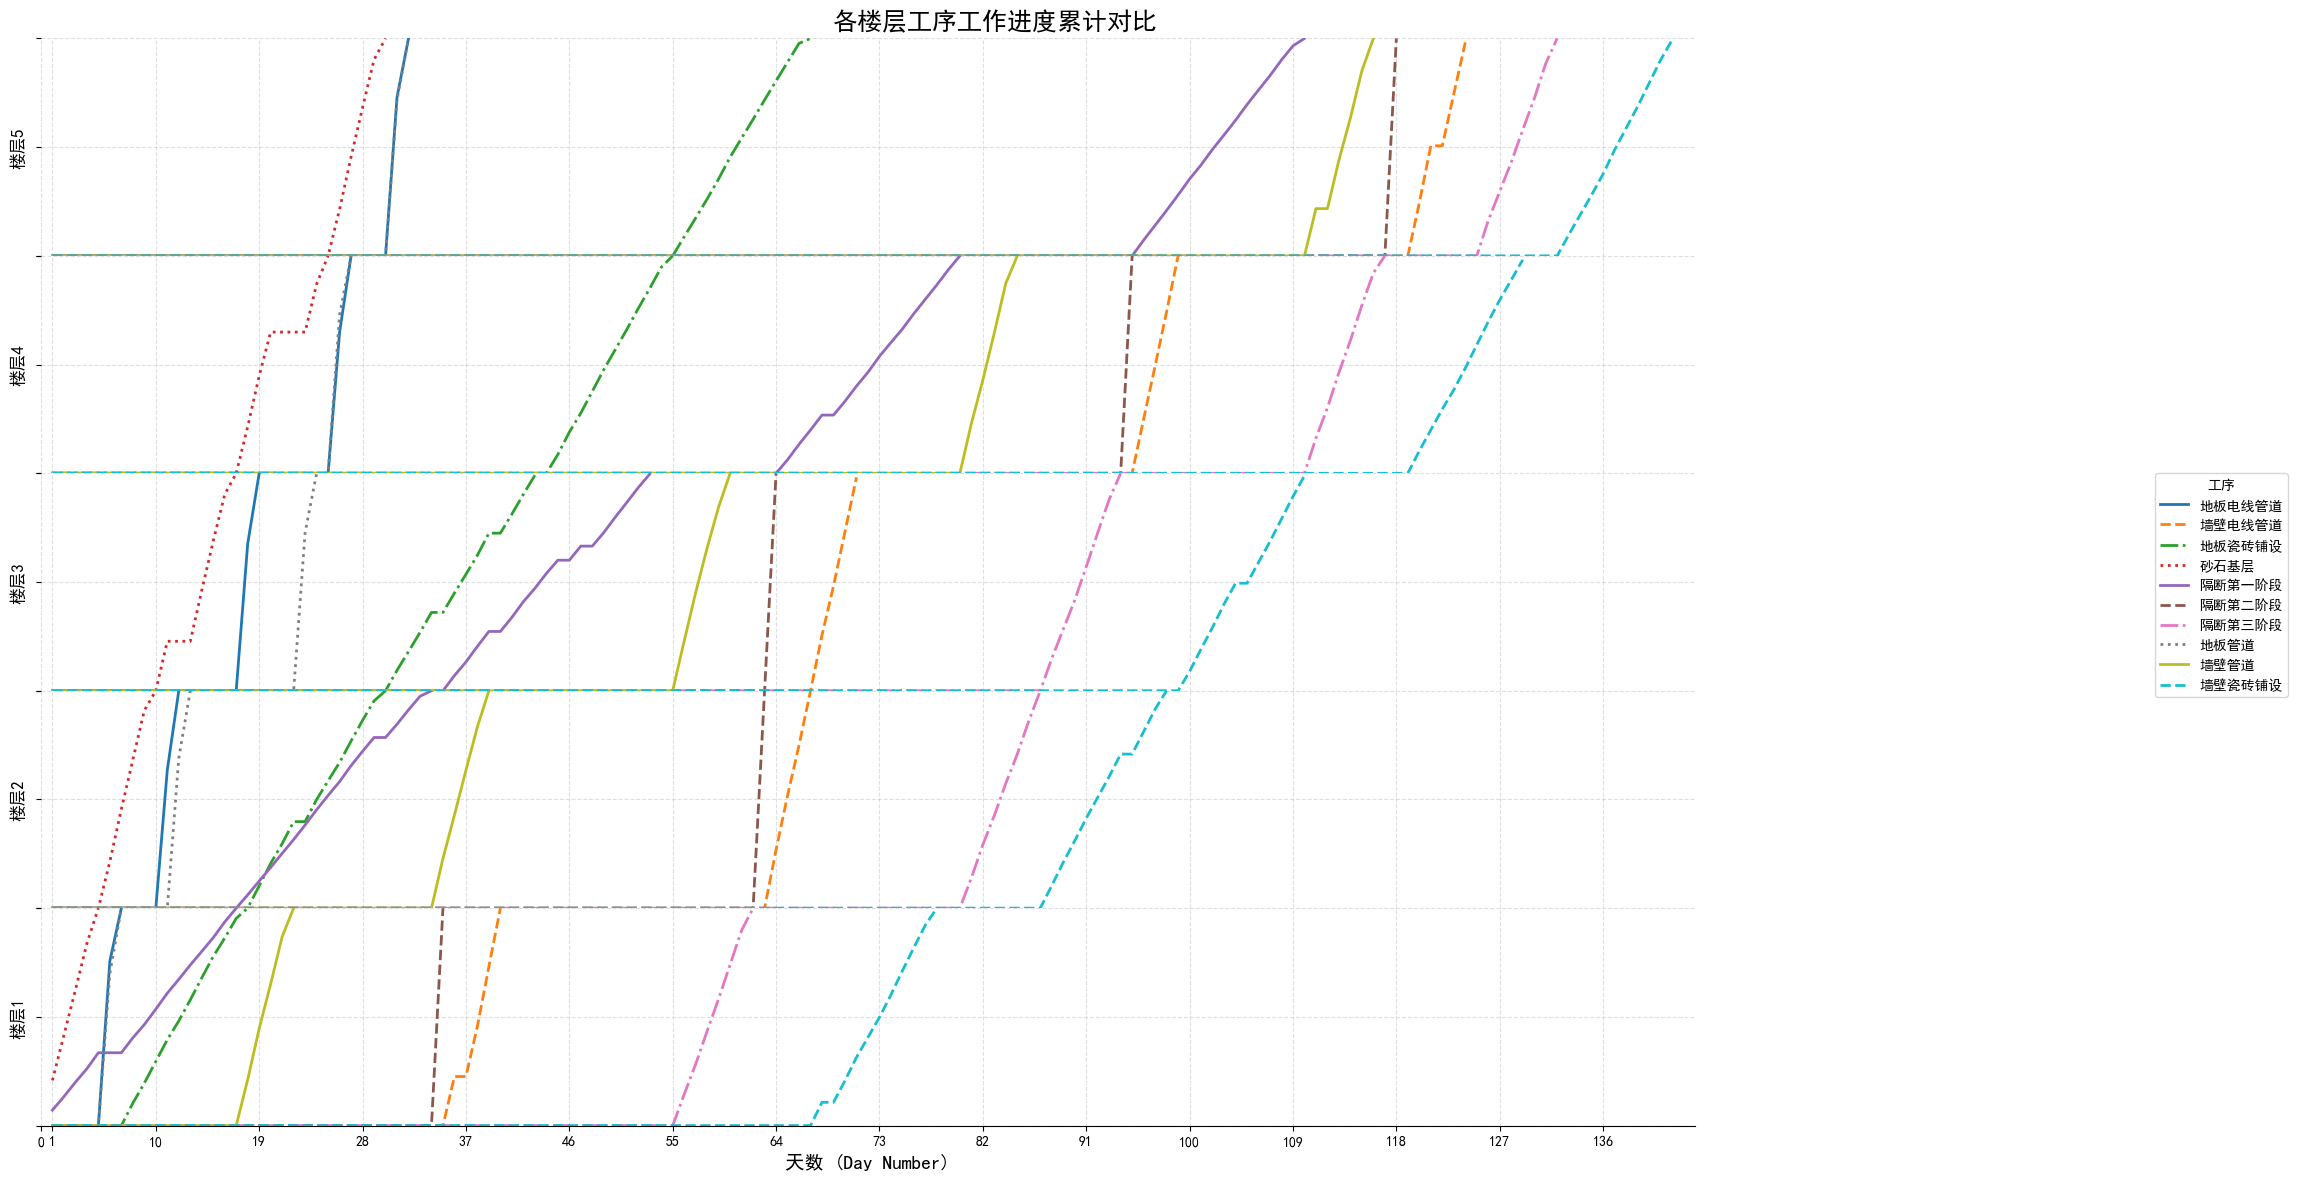

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from cycler import cycler
from matplotlib.gridspec import GridSpec

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# --- 数据准备 ---
# 1. 定义所有需要绘制的工序
processes = [
    'Electric conduits in the floor',
    'Electric conduits in the wall',
    'Floor tiling',
    'Gravel base layer',
    'Partition phase 1',
    'Partition phase 2',
    'Partition phase 3',
    'Pipes in the floor',
    'Pipes in the wall',
    'Wall tiling'
]

# 2. 中文对应表（用于图例和标题显示）
process_names_cn = {
    'Electric conduits in the floor': '地板电线管道',
    'Electric conduits in the wall': '墙壁电线管道',
    'Floor tiling': '地板瓷砖铺设',
    'Gravel base layer': '砂石基层',
    'Partition phase 1': '隔断第一阶段',
    'Partition phase 2': '隔断第二阶段',
    'Partition phase 3': '隔断第三阶段',
    'Pipes in the floor': '地板管道',
    'Pipes in the wall': '墙壁管道',
    'Wall tiling': '墙壁瓷砖铺设'
}

# 为每层楼收集数据，以便后续组合
floor_plots_data = {}

# 使用不同颜色和线型
colors = plt.cm.tab10(np.linspace(0, 1, 10))
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

# 所有楼层共享的最大和最小天数
all_days = []

# 首先为每层楼收集数据（不单独显示每层图表）
for floor_num in range(1, 6):
    # 保存当前楼层的所有工序数据
    floor_data = {}
    
    # 处理每个工序
    for i, process in enumerate(processes):
        # 筛选当前工序数据
        process_df = df[df['process'] == process].copy()
        
        # 只保留当前层的数据
        process_df = process_df[process_df['floor'] == floor_num]
        
        if len(process_df) == 0:
            continue  # 如果没有数据，跳过此工序
        
        # 计算每日工作量比例
        process_df['planned_remaining_safe'] = process_df['planned_remaining'].replace(0, np.nan)
        process_df['workload_ratio'] = process_df['today_workload'] / process_df['planned_remaining_safe']
        
        # 确保 day_number 是数值类型并排序
        process_df['day_number'] = pd.to_numeric(process_df['day_number'], errors='coerce')
        process_df.dropna(subset=['day_number', 'workload_ratio'], inplace=True)
        process_df.sort_values(by=['day_number'], inplace=True)
        
        # 收集此工序的所有天数
        days = process_df['day_number'].unique()
        all_days.extend(days)
        
        # 初始化累计工作量和坐标点
        cumulative_work = 0
        x_values = []
        y_values = []
        
        # 获取所有天数
        days = sorted(process_df['day_number'].unique())
        
        # 对每一天进行处理
        for day in days:
            day_data = process_df[process_df['day_number'] == day]
            ratio = day_data['workload_ratio'].iloc[0]
            
            # 添加点坐标
            x_values.append(day)
            
            # 累加工作量比例
            cumulative_work += ratio
            y_values.append(cumulative_work)
        
        # 保存数据用于组合图
        floor_data[process] = {'x': x_values, 'y': y_values, 'color': colors[i], 'style': line_styles[i]}
    
    # 保存此楼层的数据
    floor_plots_data[floor_num] = floor_data

# 创建一个共享x轴的子图布局
fig, axs = plt.subplots(5, 1, figsize=(20, 12), sharex=True)

# 创建共享的图例数据
legend_handles = []
legend_labels = []
used_processes = set()

# 为每层创建一个子图
for i, floor_num in enumerate(range(5, 0, -1)):  # 从5楼到1楼倒序排列
    ax = axs[i]
    
    # 处理每个工序
    for j, process in enumerate(processes):
        if process in floor_plots_data[floor_num]:
            data = floor_plots_data[floor_num][process]
            
            # 绘制折线
            line, = ax.plot(data['x'], data['y'], 
                      linestyle=data['style'],
                      color=data['color'],
                      linewidth=2)
            
            # 只为第一次出现的工序添加到图例
            if process not in used_processes:
                legend_handles.append(line)
                legend_labels.append(process_names_cn[process])
                used_processes.add(process)
    
    # 设置y轴标签为楼层号
    ax.set_ylabel(f'楼层{floor_num}', fontsize=12)
    
    # 添加网格线
    ax.grid(True, linestyle='--', alpha=0.4)
    
    # 设置Y轴范围为0-1
    ax.set_ylim(0, 1.0)
    
    # 设置Y轴刻度位置，但不显示刻度标签（仅保留网格）
    ax.set_yticks([0, 0.5, 1.0])
    ax.set_yticklabels([])
    
    # 移除四周的边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # 如果不是底部子图，则隐藏x轴刻度标签和底部边框
    if i < 4:
        plt.setp(ax.get_xticklabels(), visible=False)
        ax.spines['bottom'].set_visible(False)
        # 移除底部刻度
        ax.tick_params(axis='x', which='both', bottom=False)
    else:
        # 只保留底部子图的底部边框
        ax.spines['bottom'].set_visible(True)

# 设置X轴标签（只在最底部子图上添加）
axs[4].set_xlabel('天数 (Day Number)', fontsize=14)

# 设置X轴范围和刻度，确保从0天开始
if all_days:
    min_day = 0  # 从第0天开始
    max_day = max(all_days)
    plt.xlim(min_day, max_day+1)
    
    # 如果天数太多，只显示部分刻度
    unique_days = sorted(set(all_days))
    if len(unique_days) > 15:
        step = max(1, len(unique_days) // 15)
        plt.xticks([0] + unique_days[::step])  # 确保显示0天
    else:
        plt.xticks([0] + unique_days)  # 确保显示0天

# 添加总标题
fig.suptitle('各楼层工序工作进度累计对比', fontsize=18)

# 添加一个图例，显示所有工序，放在图的右侧
fig.legend(legend_handles, legend_labels, 
          loc='center right', 
          title='工序',
          bbox_to_anchor=(1.15, 0.5))

# 调整子图之间的间距为0，完全消除子图之间的空白
plt.subplots_adjust(hspace=0)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0)  # 为图例留出空间，并消除子图之间的间隔

# 处理完成的工作标记（当累计进度达到1时不再显示后续进度）
for i, floor_num in enumerate(range(5, 0, -1)):  # 从5楼到1楼倒序排列
    ax = axs[i]
    
    # 获取当前子图中的所有线条
    lines = ax.get_lines()
    
    # 处理每条线
    for line in lines:
        # 获取该线的x和y数据
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # 查找首次达到或超过1.0的位置
        completion_indices = np.where(ydata >= 0.98)[0]  # 允许轻微误差，0.98视为完成
        
        if len(completion_indices) > 0:
            # 首次达到完成的索引
            completion_idx = completion_indices[0]
            
            # 如果不是已经完成的最后一个点，则截断后面的点
            if completion_idx < len(xdata) - 1:
                # 将线条截断到完成点
                line.set_data(xdata[:completion_idx + 1], ydata[:completion_idx + 1])

# 显示组合图表
plt.show()



主要修改点：

1. **去除纵轴总标签**：删除了`fig.text()`函数对累计工作量比例的标注

2. **确保层与层之间直接连接**：
   - 使用了`ax.spines['left'].set_visible(False)`移除了左侧边框
   - 移除了Y轴刻度标签：`ax.set_yticklabels([])`
   - 修改了Y轴上限为精确的1.0：`ax.set_ylim(0, 1.0)`
   - 保留了Y轴网格线以便于参考

3. **从第0天开始绘图**：
   - 设置X轴起点为0：`min_day = 0`
   - 确保X轴刻度包含0：`plt.xticks([0] + unique_days[::step])`

4. **一项工作完成后隐藏后续标记**：
   - 添加了代码块处理完成的工作，当累计进度达到0.98（接近1）时，截断后续数据点
   - 使用`line.set_data()`方法重新设置线条的数据，只保留达到完成前的点

这样修改后的图表能够满足您提出的所有要求，各楼层之间直接连接无间隔，从0天开始显示，并且工作完成后不再显示后续标记。